# Projet 5 : Segmentation des clients d'un site d'e-commerce - Clustering

In [1]:
# Chargement modules
from datetime import date
from IPython.display import display
import json
import matplotlib.pyplot as plt
import numpy asnp
import pandas as pd
import seaborn as sns

pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 200)

## 1- Lecture des fichiers de data

In [2]:
data_agg_4 = pd.read_csv('aggregate_data.csv', index_col='customer_unique_id')
data_to_agg = pd.read_csv('to_aggregate_data.csv')

In [3]:
display(data_to_agg, data_agg_4)

order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214            1.0   
1      130898c0987d1801452a8ed92a670612            1.0   
2      532ed5e14e24ae1f0d735b91524b98b9            1.0   
3      6f8c31653edb8c83e1a739408b5ff750            1.0   
4      7d19f4ef4d04461989632411b7e588b9            1.0   
...                                 ...            ...   
94285  c21644b7357edc759d62861949c807f2            1.0   
94286  2cfc3681e512e0d12b6fe84b396e3907            1.0   
94287  1b546846285271f61f42bf2954352172            2.0   
94288  8c24ff4b5a28bb8f08034fca0e4e1263            1.0   
94289  9980064d9817bacc9e261e7f5fcf3fe5            1.0   

                     customer_unique_id   price  freight_value payment_type  \
0      871766c5855e863f6eccc05f988b23cb   58.90          13.29  credit_card   
1      0fb8e3eab2d3e79d92bb3fffbb97f188   55.90          17.96       boleto   
2      3419052c8c6b45daf79c1e426f9e9bcb   64.90          18.33  credit_card   
3      e7c828d22c0682c1565252deefbe334d   58.90          16.17  credit_card   
4      0bb98ba72dcc08e95f9d8cc434e9a2cc   58.90          13.29  credit_card   
...                                 ...     ...            ...          ...   
94285  914b5fd6781d4dfd59641119b6d0e1de   16.80          15.10  credit_card   
94286  4637328fb3cc446c747c7f83f80c651d   15.99          18.23  credit_card   
94287  3cc9db37d3df6c5b00e68a8f28d76f71   21.99           7.67       boleto   
94288  ced0da108c30beadd4b01f58b4ed3075   89.80          11.25  credit_card   
94289  56c8638e7c058b98aae6d74d2dd6ea23  129.90          15.66  credit_card   

       review_score                             review_comment_message  \
0                 5     Perfeito, produto entregue antes do combinado.   
1                 5  lannister como sempre, entregou certinho e den...   
2                 4                              carrinho muito bonito   
3                 5                                                NaN   
4                 5                                                NaN   
...             ...                                                ...   
94285             4                                                NaN   
94286             4                                                NaN   
94287             5                                                NaN   
94288             4                                                NaN   
94289             5                                                NaN   

      order_purchase_timestamp order_delivered_customer_date  \
0          2017-09-13 08:59:02           2017-09-20 23:43:48   
1          2017-06-28 11:52:20           2017-07-13 20:39:29   
2          2018-05-18 10:25:53           2018-06-04 18:34:26   
3          2017-08-01 18:38:42           2017-08-09 21:26:33   
4          2017-08-10 21:48:40           2017-08-24 20:04:21   
...                        ...                           ...   
94285      2017-11-15 19:08:22           2017-11-28 16:53:16   
94286      2018-04-22 20:15:52           2018-04-30 20:51:45   
94287      2017-05-08 12:01:54           2017-05-16 10:23:48   
94288      2018-05-06 16:56:31           2018-05-09 19:48:50   
94289      2017-07-12 06:48:11           2017-07-17 20:06:26   

      order_delivered_carrier_date          customer_city customer_state  \
0              2017-09-19 18:34:16  campos dos goytacazes             RJ   
1              2017-07-05 12:00:33                  jatai             GO   
2              2018-05-23 14:05:00         belo horizonte             MG   
3              2017-08-02 19:07:36   sao jose dos pinhais             PR   
4              2017-08-11 19:43:07   conselheiro lafaiete             MG   
...                            ...                    ...            ...   
94285          2017-11-21 11:58:45                araujos             MG   
94286          2018-04-24 00:58:19             uberlandia             MG   
94287          2017-05-09 13:13:53       fr

mean_basket_price  mean_basket_product  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2             129.90                  1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f              18.90                  1.0   
0000f46a3911fa3c0805444483337064              69.00                  1.0   
0000f6ccb0745a6a4b88665a16c9f078              25.99                  1.0   
0004aac84e0df4da2b147fca70cf8255             180.00                  1.0   
...                                             ...                  ...   
fffcf5a5ff07b0908bd4e2dbc735a684            1570.00                  2.0   
fffea47cd6d3cc0a88bd621562a9d061              64.89                  1.0   
ffff371b4d645b6ecea244b27531430a              89.90                  1.0   
ffff5962728ec6157033ef9805bacc48             115.00                  1.0   
ffffd2657e2aad2907e67c3e9daecbeb              56.99                  1.0   

                                  mean_delivery_time  mean_basket_paiyed  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2            6.411227              141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f            3.285590               27.19   
0000f46a3911fa3c0805444483337064           25.731759               86.22   
0000f6ccb0745a6a4b88665a16c9f078           20.037083               43.62   
0004aac84e0df4da2b147fca70cf8255           13.141134              196.89   
...                                              ...                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684           27.514861             2067.42   
fffea47cd6d3cc0a88bd621562a9d061           30.097500               84.58   
ffff371b4d645b6ecea244b27531430a           14.872083              112.46   
ffff5962728ec6157033ef9805bacc48           11.858854              133.69   
ffffd2657e2aad2907e67c3e9daecbeb            7.552118               71.56   

                                  mean_ratio_basket_price_product_qty  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2                               129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f                                18.90   
0000f46a3911fa3c0805444483337064                                69.00   
0000f6ccb0745a6a4b88665a16c9f078                                25.99   
0004aac84e0df4da2b147fca70cf8255                               180.00   
...                                                               ...   
fffcf5a5ff07b0908bd4e2dbc735a684                               785.00   
fffea47cd6d3cc0a88bd621562a9d061                                64.89   
ffff371b4d645b6ecea244b27531430a                                89.90   
ffff5962728ec6157033ef9805bacc48                               115.00   
ffffd2657e2aad2907e67c3e9daecbeb                                56.99   

                                  sum_ordered_product       customer_city  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2                  1.0             cajamar   
0000b849f77a49e4a4ce2b2a4ca5be3f                  1.0              osasco   
0000f46a3911fa3c0805444483337064                  1.0            sao jose   
0000f6ccb0745a6a4b88665a16c9f078                  1.0               belem   
0004aac84e0df4da2b147fca70cf8255                  1.0            sorocaba   
...                                               ...                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684                  2.0             sanharo   
fffea47cd6d3cc0a88bd621562a9d061                  1.0    feira de santana   
ffff371b4d645b6ecea244b27531430a                  1.0               sinop   
ffff5962728ec6157033ef9805bacc48                  1.0  bom jesus do norte   
ffffd2657e2aad2907e67c3e9daecbeb                  1.0         campo largo   

                                 customer_state     first_order_date  \
customer_unique_id              

In [4]:
# Fonction de calcul du mode
def most(X):
    """Calcul du mode"""
    from scipy.stats import mode
    md = mode(X, axis=None)
    return md[0][0]

In [5]:
# Fonction de découpage et calcul des valeurs des features

def agg_cut(data=data_to_agg, first_date='2017-07-01 00:00:01',
            last_date='2018-06-31 23:59:59'):
    """Fonction de découpage et d'aggrégation
    des datasets pour une segmentation clients"""

    # Liste des features envisageables pour la segmentation
    col_2 = ['customer_unique_id', 'order_id', 'basket_price_mean',
             'delivery_mean_time', 'basket_product_mean',
             'sum_ordered_product', 'freight_value']
    col_3 = ['price', 'freight_value',
             'customer_unique_id', 'order_qty',
             'most_payment_type',
             'review_score', 'review_comment',
             'last_order_date', 'first_order_date',
             'customer_city', 'customer_state',
             'sum_paiyed_price', 'sum_freight_value',
             'seller_city', 'seller_state',
             'product_category_name_english', 'product_category_new',
             'product_weight_g', 'product_volume']

    # Découpage temporelle du dataset
    data_to_agg_1 = data_to_agg[(data_to_agg['order_purchase_timestamp']
                                 > first_date)
                                & (data_to_agg['order_purchase_timestamp']
                                   < last_date)]

    # Première aggrégation en fonction des clients
    # et de leurs commandes (1ère étape)
    data_agg_1b = pd.pivot_table(data_to_agg_1[col_2],
                                 index=['customer_unique_id', 'order_id'],
                                 aggfunc={'basket_price_mean': np.sum,
                                          'delivery_mean_time': np.max,
                                          'basket_product_mean': np.max,
                                          'sum_ordered_product': np.max,
                                          'freight_value': np.sum})
    # Création de nouvelles features
    A = (data_agg_1b['basket_price_mean']
         / data_agg_1b['basket_product_mean'])
    data_agg_1b['mean_ratio_basket_price_product_qty'] = A
    data_agg_1b['mean_basket_paiyed'] = (data_agg_1b['basket_price_mean']
                                         + data_agg_1b['freight_value'])

    # Première aggrégation en fonction des clients
    # et de leurs commandes (2ème étape)
    aggfunc_2 = {'basket_price_mean': np.mean,
                 'delivery_mean_time': np.mean,
                 'basket_product_mean': np.mean,
                 'sum_ordered_product': np.sum,
                 'mean_ratio_basket_price_product_qty': np.mean,
                 'mean_basket_paiyed': np.mean}
    data_agg_2b = pd.pivot_table(data_agg_1b,
                                 index=['customer_unique_id'],
                                 aggfunc=aggfunc_2)

    # Deuxième aggrégation en fonction des clients
    aggfunc_3 = {'price': np.mean,
                 'sum_paiyed_price': np.sum,
                 'freight_value': np.mean,
                 'sum_freight_value': np.sum,
                 'order_qty': len,
                 'most_payment_type': most,
                 'review_score': np.mean,
                 'review_comment': np.mean,
                 'last_order_date': np.max,
                 'first_order_date': np.min,
                 'customer_city': most,
                 'customer_state': most,
                 'seller_city': most,
                 'seller_state': most,
                 'product_category_name_english': most,
                 'product_category_new': most,
                 'product_weight_g': np.mean,
                 'product_volume': np.mean}
    data_agg_3b = pd.pivot_table(data_to_agg_1[col_3],
                                 index=['customer_unique_id'],
                                 aggfunc=aggfunc_3)

    # Rassemblement des dataset aggréger
    data_agg_4b = pd.concat([data_agg_2b, data_agg_3b], axis=1)

    # Variables temporelle pour calcul des fréquences et récences
    data_agg_4b['data_lim_min'] = [first_date
                                   for x in range(data_agg_4b.shape[0])]
    data_agg_4b['data_lim_max'] = [last_date
                                   for x in range(data_agg_4b.shape[0])]
    data_agg_4b['data_lim_min'] = pd.to_datetime(data_agg_4b['data_lim_min'])
    data_agg_4b['data_lim_max'] = pd.to_datetime(data_agg_4b['data_lim_max'])

    # Calcul frequences
    delta_years_1 = data_agg_4b['data_lim_max'] - data_agg_4b['data_lim_min']
    delta_years = delta_years_1.dt.total_seconds() / (60*60*24*365)
    data_agg_4b['order_frequency_years'] = (data_agg_4b['order_qty']
                                            / delta_years)

    # Calcul de recence
    last_order_delta_1 = np.abs(data_agg_4b['last_order_date'].astype('datetime64')
                                - data_agg_4b['data_lim_max'])
    last_order_delta = last_order_delta_1.dt.total_seconds() / (60*60*24)
    data_agg_4b['order_recency_days'] = last_order_delta

    # Rename de variables
    replace_name = {'price': 'mean_product_price',
                    'basket_price_mean': 'mean_basket_price',
                    'delivery_mean_time': 'mean_delivery_time',
                    'freight_value': 'mean_freight_value',
                    'basket_product_mean': 'mean_basket_product',
                    'review_comment': 'ratio_review_comment_order_qty',
                    'product_weight_g': 'mean_product_weight',
                    'product_volume': 'mean_product_volume'}
    data_agg_4b = data_agg_4b.rename(columns=replace_name)

    return data_agg_4b

# Clustering

In [6]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib as mpl

mpl.rcParams["figure.figsize"] = (9, 6)

## Définition du score

In [7]:
# DB Score & Silouette Score
from sklearn.metrics import davies_bouldin_score as db_score
from sklearn.metrics import silhouette_score

## Preprocessing

In [8]:
# Preprocessing
# Création des pipelines pour les différentes catégories
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler, PowerTransformer  
from sklearn.preprocessing import QuantileTransformer, RobustScaler
from sklearn.preprocessing import StandardScaler


numerical_pipeline = make_pipeline(QuantileTransformer(output_distribution='normal')
                                   #FunctionTransformer(np.log1p),
                                   #StandardScaler(),
                                   #MinMaxScaler(),
                                   #RobustScaler()
                                   )
discret_pipeline = make_pipeline(#QuantileTransformer(output_distribution = 'normal', n_quantiles = 100),
                                 #MinMaxScaler(),
                                 #StandardScaler(),
                                 PowerTransformer(method='box-cox')
                                 )
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [9]:
# Variables utilsées lors du clustering

categorical_features = [#'most_payment_type',
                        #'first_order_date',
                        #'last_order_date',
                        #'customer_city',
                        #'customer_state',
                        #'seller_city',
                        #'seller_state',
                        #'product_category_name_english',
                        #'product_category_new'
                        ]
discret_features = [#'mean_basket_product',
                    #'order_frequency_years',
                    'review_score',
                    #'sum_ordered_product',
                    #'ratio_review_comment_order_qty',
                    #'order_qty',
                   ]
numerical_features = [#'mean_basket_price',
                      'sum_paiyed_price',
                      #'mean_basket_paiyed',
                      #'mean_basket_product',
                      'sum_ordered_product',
                      #'mean_delivery_time',
                      #'mean_ratio_basket_price_product_qty',
                      #'mean_freight_value',
                      #'sum_freight_value',
                      #'order_qty',
                      'mean_product_price',
                      #'mean_product_volume',
                      #'mean_product_weight',
                      #'ratio_review_comment_order_qty',
                      #'review_score',
                      'order_frequency_years',
                      'order_recency_days',
                      #'first_order_delta_years'
                     ]


# Création du transformer preprocessor
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       (categorical_pipeline, categorical_features),
                                       (discret_pipeline, discret_features))


# Définition des features et features_trans
list_features = categorical_features + numerical_features + discret_features
features = data_agg_4[list_features]#.sample(frac=0.1, random_state = 5)
features_trans = preprocessor.fit_transform(features)

<Figure size 1440x720 with 0 Axes>

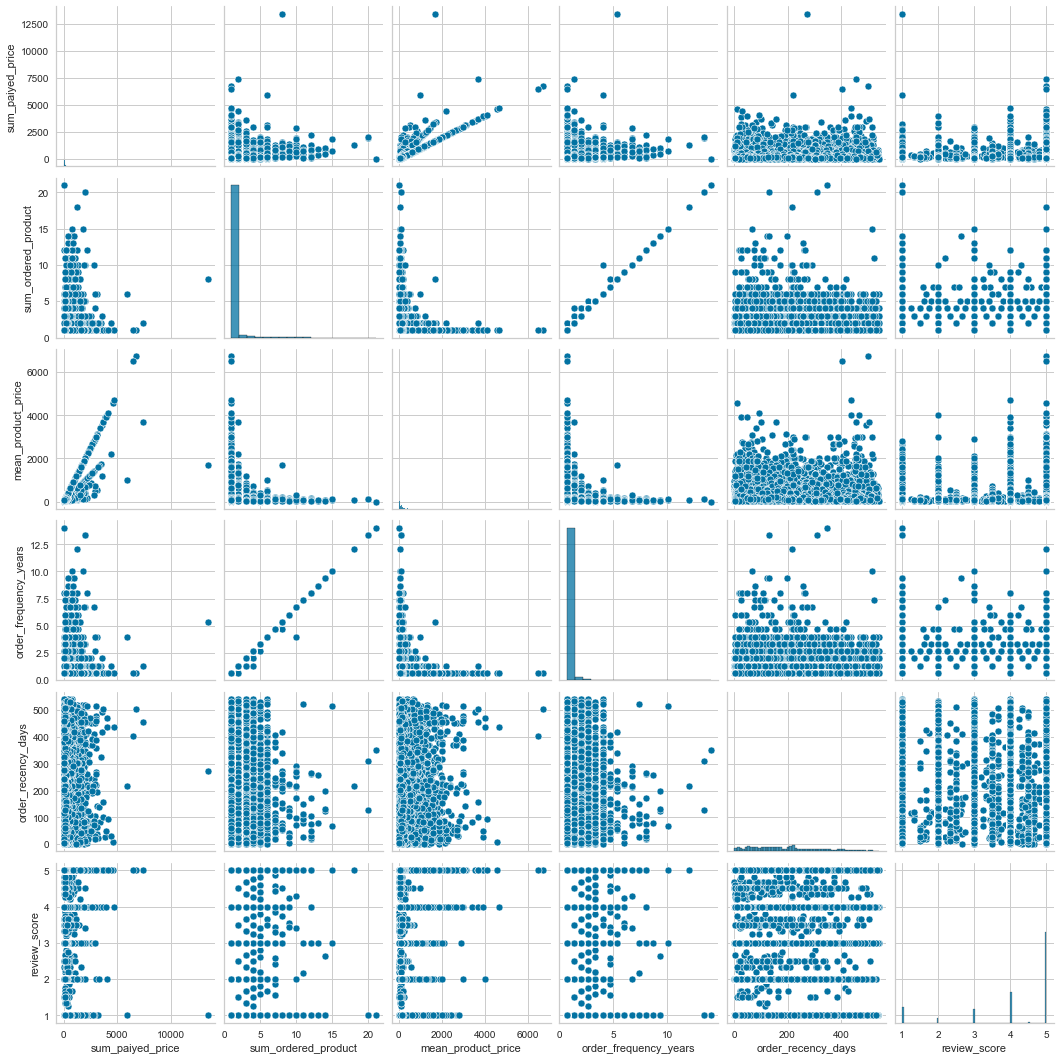

In [10]:
# Tracé de pairplots des dataframes
plt.figure(figsize=(20, 10))
pair = sns.pairplot(features)
pair.fig.set_size_inches(15, 15)
plt.show()

## Modèle K-Means

### Détermination des k

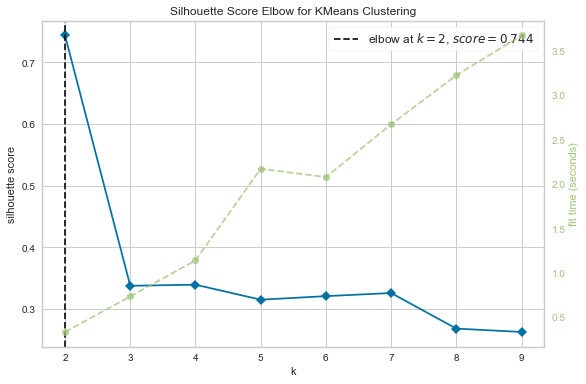

<Figure size 1080x504 with 0 Axes>

<Figure size 648x432 with 0 Axes>

In [11]:
# Instantiate the clustering model and visualizer
from sklearn.cluster import KMeans
model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')

visualizer.fit(features_trans)    # Fit the data to the visualizer
plt.figure(figsize=(15, 7))
visualizer.poof()    # Draw/show/poof the data
plt.savefig(f"Silhouette_elbow.png", bbox_inches="tight")
plt.show()

In [12]:
# Recherche du nombre idéal de cluster - Elbow
from sklearn.cluster import KMeans

inertia = []
db_scores = []
k_range = range(1, 10)
for k in k_range:
    km_model = KMeans(n_clusters=k, random_state=5)
    km_model.fit(features_trans)
    inertia.append(km_model.inertia_)
    if k >= 2:
        db_scores.append(db_score(features_trans, km_model.labels_))

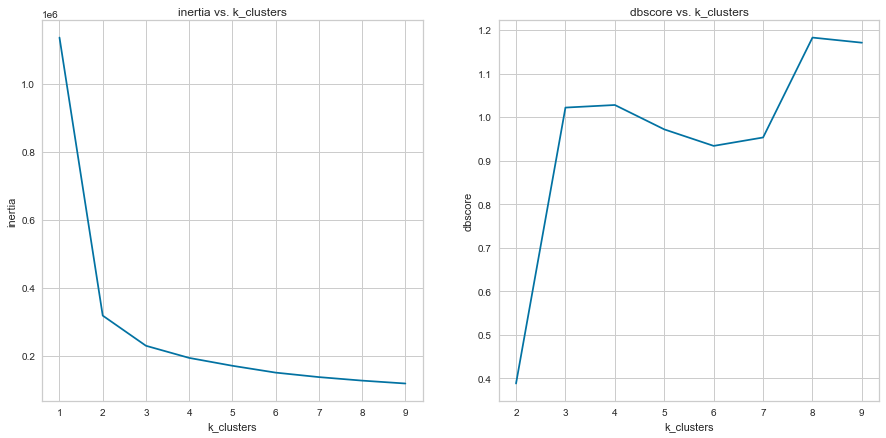

In [13]:
# Représentation des inerties et score DB en fonction de k
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia)
plt.title("inertia vs. k_clusters")
plt.xlabel("k_clusters")
plt.ylabel("inertia")
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), db_scores)
plt.title("dbscore vs. k_clusters")
plt.xlabel("k_clusters")
plt.ylabel("dbscore")
plt.savefig(f"inertia_elbow.png", bbox_inches="tight")
plt.show()

### Entraînement 

In [14]:
# Entraînement avec le nombre k de cluster
import time

km_model = KMeans(n_clusters=6, random_state=5)
begin_time = time.time()
km_model.fit(features_trans)
end_time = time.time()
time_fit = "{:.2f}".format(end_time - begin_time)
print(f"Temps de fit : {time_fit} s")

Temps de fit : 2.31 s


In [15]:
# Création de dataset avec features et label
data_km_model = features.copy()
data_km_model['labels'] = km_model.labels_

In [16]:
def uniform_label(data=data_km_model) : 
    """Permet de d'uniformiser les labels même pour des kmeans fit différents"""
    df = pd.DataFrame(columns=features.columns)
    for x in [0, 1, 2, 3, 4, 5]: 
        A = data[data['labels'] == x]
        value_1 = A[features.columns].mean().to_numpy().reshape(1, -1)
        dfa = pd.DataFrame(columns=features.columns, data = value_1)
        dfa['labels'] = x
        df = pd.concat([df, dfa], ignore_index=True)
        
    x0 = df[df['sum_paiyed_price'] == df['sum_paiyed_price'].max()].loc[:, 'labels']
    X0 = x0.to_list()[0]
    x1 = df[df['sum_paiyed_price'] == df['sum_paiyed_price'].min()].loc[:, 'labels']
    X1 = x1.to_list()[0]
    x2 = df[df['order_recency_days'] == df['order_recency_days'].max()].loc[:, 'labels']
    X2 = x2.to_list()[0]
    x3 = df[df['order_recency_days'] == df['order_recency_days'].min()].loc[:, 'labels']
    X3 = x3.to_list()[0]
    x4 = df[df['order_frequency_years'] == df['order_frequency_years'].max()].loc[:, 'labels']
    X4 = x4.to_list()[0]
    x5 = df[df['review_score'] == df['review_score'].min()].loc[:,'labels']
    X5 = x5.to_list()[0]
    
    replace_dic = {X0: 0, X1: 1, X2: 2, X3: 3, X4: 4, X5: 5}
    
    data['labels'] = data['labels'].replace(replace_dic)
    
    return data

In [17]:
#Uniformisation des labels pour différents fit
data_km_model = uniform_label(data_km_model)

### Analyse du clustering

In [18]:
# Score du fit
dbscore = db_score(features_trans, km_model.labels_)
sil_score = silhouette_score(features_trans, km_model.labels_)
display(f"le DB score est de {dbscore}, et le score de silhouette est"
        f" {sil_score}")

'le DB score est de 0.9337897461325596, et le score de silhouette est 0.3210471784390591'

In [19]:
# Calcul des valeurs statistiques pour chaque cluster
stat = pd.pivot_table(data_km_model, values=features.columns,
                      index=['labels', 'customer_unique_id'])
for x in data_km_model['labels'].value_counts().index:
    display(stat.loc[x, :].describe())

mean_product_price  order_frequency_years  order_recency_days  \
count        15753.000000           1.575300e+04        15753.000000   
mean            76.065020           6.684982e-01          339.130902   
std             32.235148           1.777523e-13           98.019446   
min             10.900000           6.684982e-01          150.426076   
25%             49.900000           6.684982e-01          257.237257   
50%             69.900000           6.684982e-01          335.179248   
75%             99.000000           6.684982e-01          416.128322   
max            239.900000           6.684982e-01          541.502708   

       review_score  sum_ordered_product  sum_paiyed_price  
count  15753.000000              15753.0      15753.000000  
mean       4.824351                  1.0         76.065020  
std        0.393008                  0.0         32.235148  
min        1.000000                  1.0         10.900000  
25%        5.000000                  1.0         49.900000  
50%        5.000000                  1.0         69.900000  
75%        5.000000                  1.0         99.000000  
max        5.000000                  1.0        239.900000

mean_product_price  order_frequency_years  order_recency_days  \
count        14589.000000           1.458900e+04        14589.000000   
mean           101.805105           6.684982e-01           74.191916   
std             48.224295           1.742000e-13           50.407891   
min             24.900000           6.684982e-01            0.000127   
25%             64.990000           6.684982e-01           32.025694   
50%             97.000000           6.684982e-01           66.381632   
75%            129.000000           6.684982e-01          108.289722   
max            733.300000           6.684982e-01          209.117778   

       review_score  sum_ordered_product  sum_paiyed_price  
count  14589.000000         14589.000000      14589.000000  
mean       4.820892             1.000069        101.805105  
std        0.396982             0.008279         48.224295  
min        1.000000             1.000000         24.900000  
25%        5.000000             1.000000         64.990000  
50%        5.000000             1.000000         97.000000  
75%        5.000000             1.000000        129.000000  
max        5.000000             2.000000        733.300000

mean_product_price  order_frequency_years  order_recency_days  \
count        13720.000000           1.372000e+04        13720.000000   
mean            96.261122           6.684982e-01          199.587307   
std             55.369999           1.712026e-13          117.196096   
min             19.990000           6.684982e-01            0.223958   
25%             55.000000           6.684982e-01          116.874757   
50%             84.990000           6.684982e-01          178.187332   
75%            120.000000           6.684982e-01          258.295315   
max            370.000000           6.684982e-01          537.103299   

       review_score  sum_ordered_product  sum_paiyed_price  
count  13720.000000         13720.000000      13720.000000  
mean       2.292784             1.000656         96.261122  
std        1.167972             0.025605         55.369999  
min        1.000000             1.000000         19.990000  
25%        1.000000             1.000000         55.000000  
50%        2.000000             1.000000         84.990000  
75%        3.000000             1.000000        120.000000  
max        4.000000             2.000000        370.000000

mean_product_price  order_frequency_years  order_recency_days  \
count        12976.000000           1.297600e+04        12976.000000   
mean            24.795207           6.684982e-01          186.421629   
std              9.127771           1.682053e-13          119.128962   
min              0.850000           6.684982e-01            0.025949   
25%             18.490000           6.684982e-01           95.595674   
50%             24.890000           6.684982e-01          164.514763   
75%             29.990000           6.684982e-01          254.548281   
max             49.000000           6.684982e-01          541.387477   

       review_score  sum_ordered_product  sum_paiyed_price  
count  12976.000000         12976.000000      12976.000000  
mean       4.403900             1.000462         24.795207  
std        0.959695             0.021499          9.127771  
min        1.000000             1.000000          0.850000  
25%        4.000000             1.000000         18.490000  
50%        5.000000             1.000000         24.890000  
75%        5.000000             1.000000         29.990000  
max        5.000000             2.000000         49.000000

mean_product_price  order_frequency_years  order_recency_days  \
count        12745.000000           1.274500e+04        12745.000000   
mean           376.962705           6.684982e-01          232.520433   
std            354.638873           1.673172e-13          125.005167   
min            130.000000           6.684982e-01            0.388079   
25%            189.900000           6.684982e-01          134.594363   
50%            256.780000           6.684982e-01          218.247870   
75%            399.790000           6.684982e-01          321.487500   
max           6735.000000           6.684982e-01          540.019873   

       review_score  sum_ordered_product  sum_paiyed_price  
count  12745.000000         12745.000000      12745.000000  
mean       4.433346             1.000078        376.962705  
std        0.975598             0.008858        354.638873  
min        1.000000             1.000000        130.000000  
25%        4.000000             1.000000        189.900000  
50%        5.000000             1.000000        256.780000  
75%        5.000000             1.000000        399.790000  
max        5.000000             2.000000       6735.000000

mean_product_price  order_frequency_years  order_recency_days  \
count        10001.000000           10001.000000        10001.000000   
mean            90.401174               1.638125          201.654452   
std            109.663845               0.743438          135.178597   
min              1.514286               1.336996            0.053472   
25%             38.400000               1.336996           89.045451   
50%             62.000000               1.336996          178.614988   
75%            107.900000               1.336996          295.499757   
max           3694.000000              14.038461          541.492095   

       review_score  sum_ordered_product  sum_paiyed_price  
count  10001.000000         10001.000000      10001.000000  
mean       3.710546             2.452355        217.298464  
std        1.539560             1.115058        297.871136  
min        1.000000             2.000000          7.800000  
25%        3.000000             2.000000         86.630000  
50%        4.000000             2.000000        144.760000  
75%        5.000000             2.000000        249.500000  
max        5.000000            21.000000      13440.000000

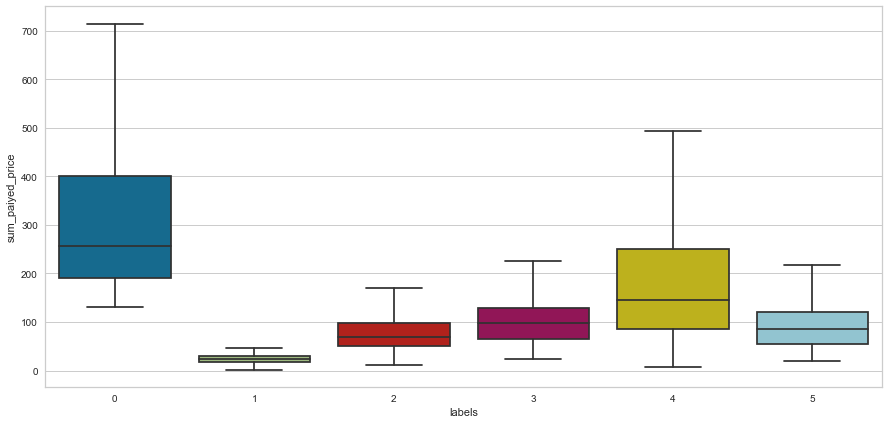

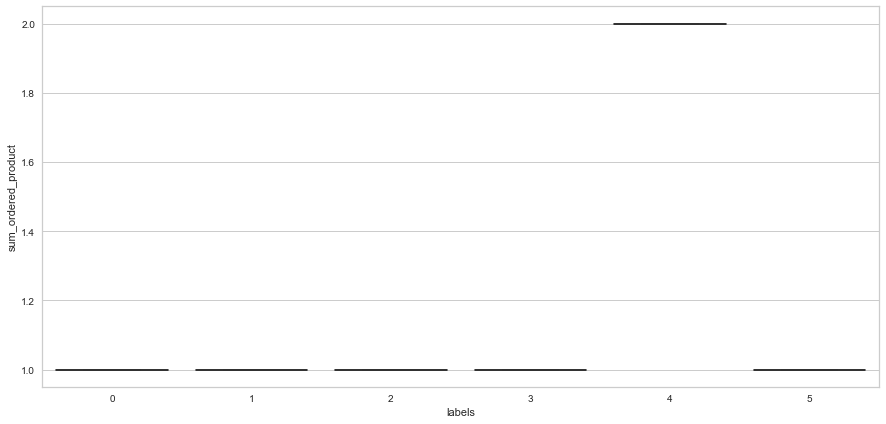

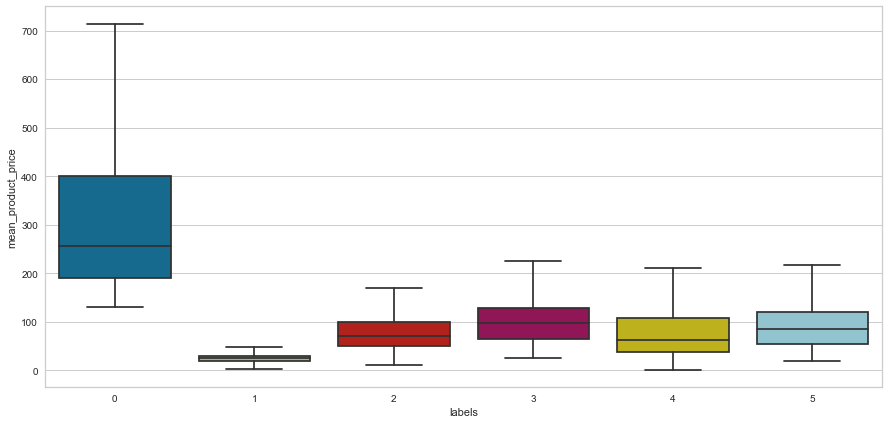

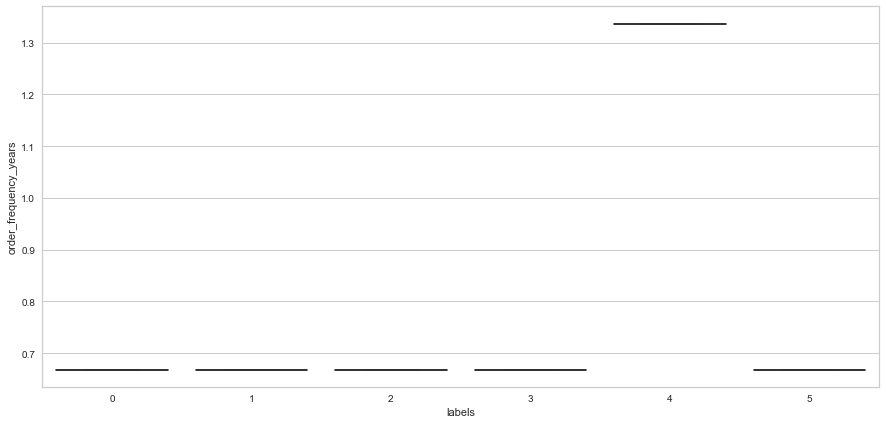

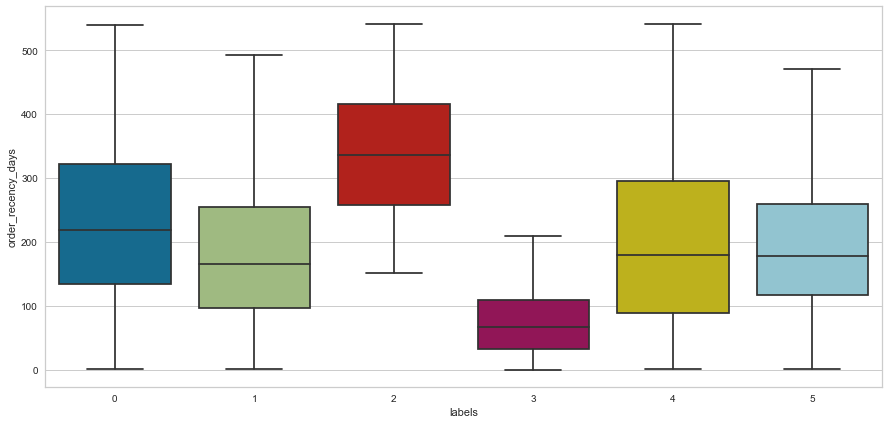

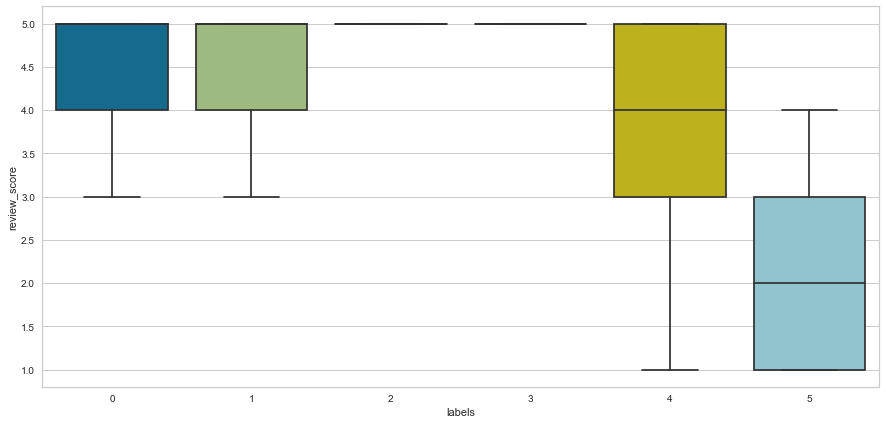

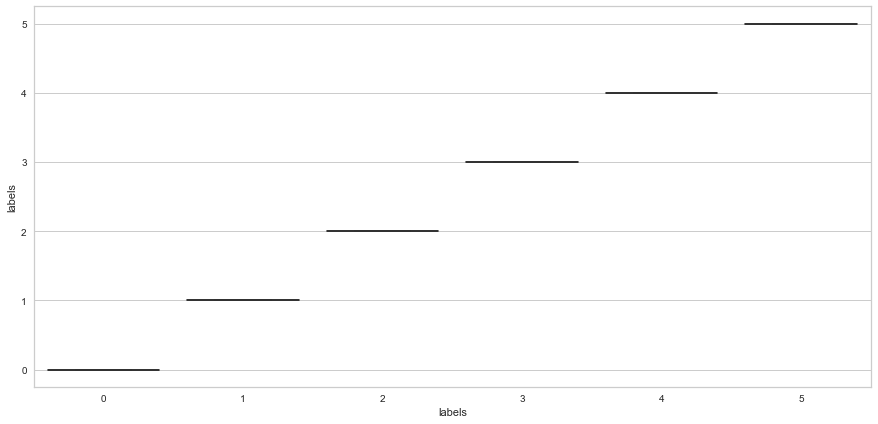

In [20]:
# Visualisation graphique features selon les labels
for col in data_km_model.columns.to_list():
    plt.figure(figsize=(15, 7))
    sns.boxplot(y=col, x='labels', data=data_km_model,
                showfliers = False)
    plt.savefig(f"kmeans_box_{col}.png", bbox_inches="tight")
    plt.show()

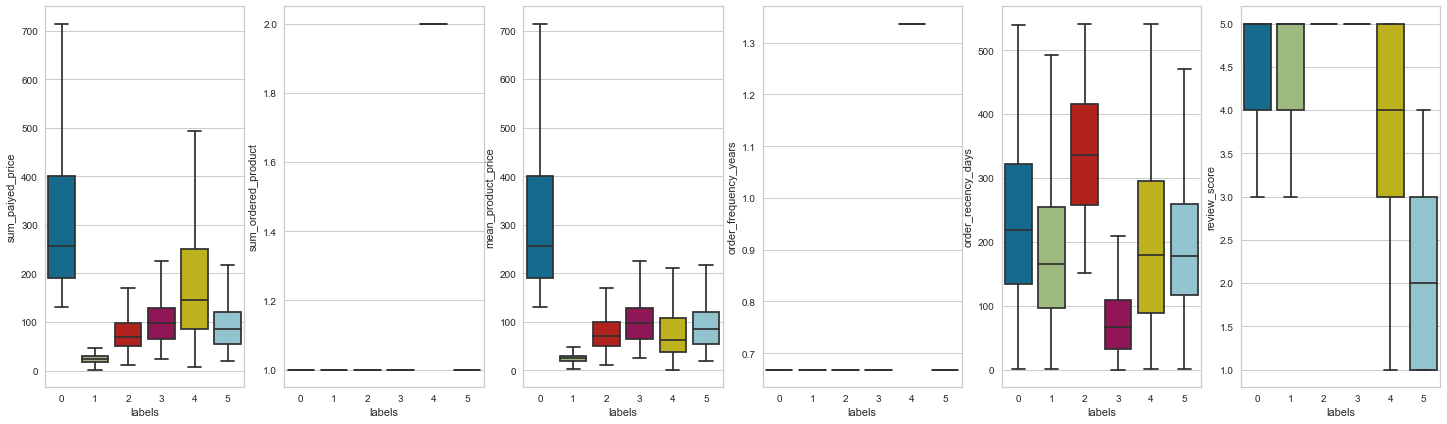

In [21]:
# Visualisation graphique features selon les labels
plt.figure(figsize=(25, 7))
for col, x in zip(data_km_model.columns,
                  range(1, len(data_km_model.columns))):
    plt.subplot(1, len(data_km_model.columns) - 1, x)
    sns.boxplot(y=col, x='labels',
                data=data_km_model, showfliers=False)
plt.savefig(f"kmeans_box_{col}_2.png", bbox_inches="tight")
plt.show()

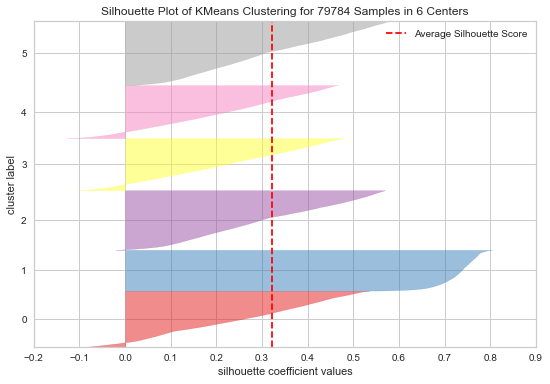

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 79784 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# Analyse de silhouette
visualizer = SilhouetteVisualizer(km_model)

visualizer.fit(features_trans)    # Fit the data to the visualizer
visualizer.poof()                 # Draw/show/poof the data

C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases late

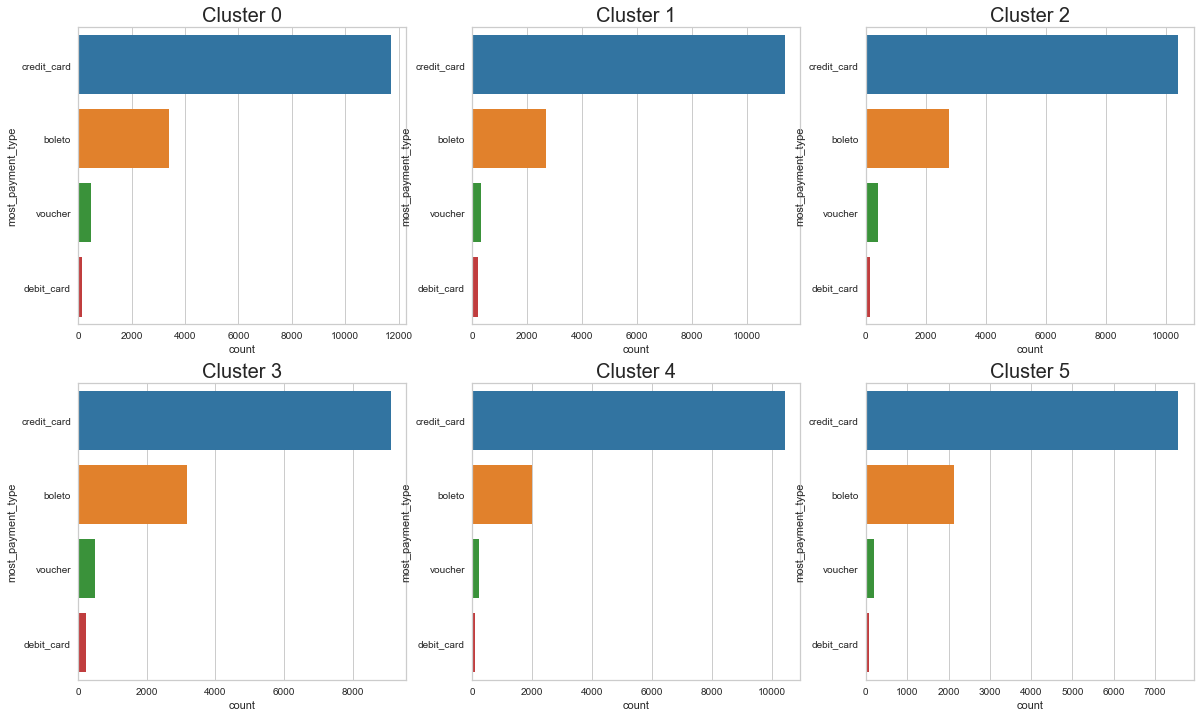

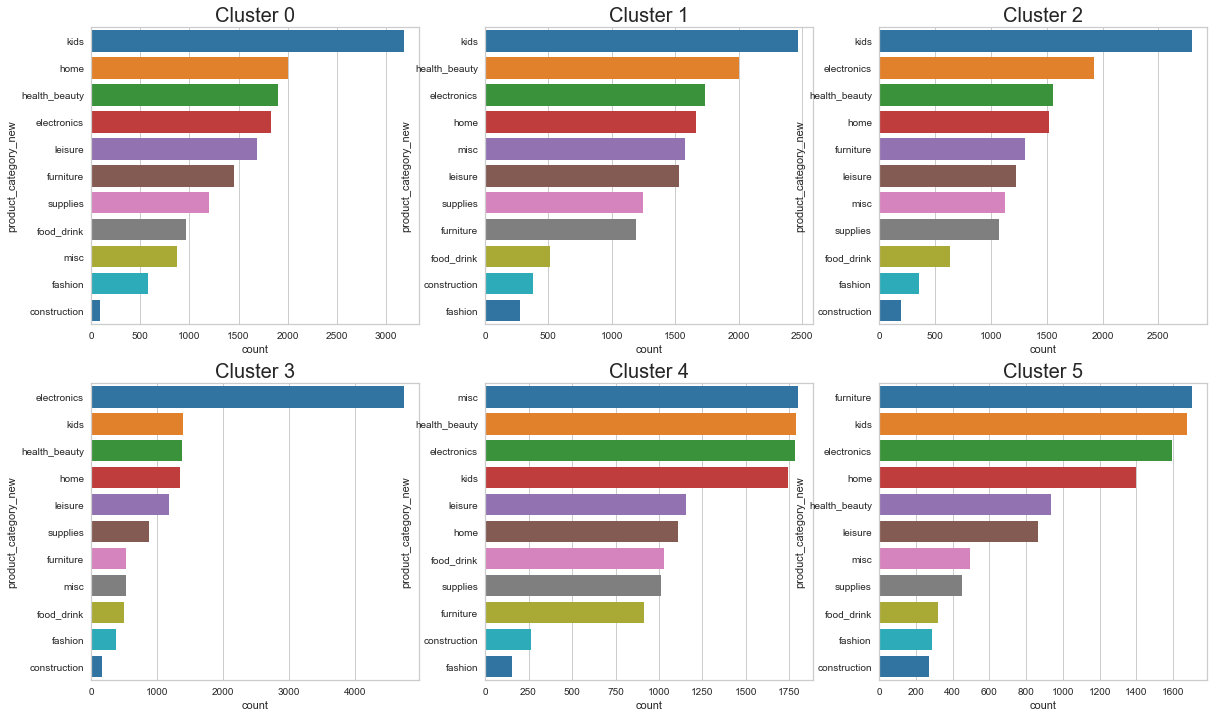

In [23]:
# Analyse des différentes catégories dans les labels
index_tot = [data_km_model[data_km_model['labels'] == x].index
             for x in data_km_model['labels'].value_counts().index]

plt.figure(figsize=(20, 12))
for x in range(len(index_tot)):
    order = data_agg_4.loc[index_tot[x], 'most_payment_type'].value_counts()
    order_hue = order.index
    plt.subplot(2, len(index_tot)/2, x+1)
    sns.countplot(y=data_agg_4.loc[index_tot[x], 'most_payment_type'],
                  order=order_hue,
                  palette='tab10')
    plt.title(f"Cluster {x}", fontsize=20)
plt.savefig(f"most_payment_type_cluster.png", bbox_inches="tight")

plt.figure(figsize=(20, 12))
for x in range(len(index_tot)):
    order = data_agg_4.loc[index_tot[x], 'product_category_new'].value_counts()
    order_hue = order.index
    plt.subplot(2, len(index_tot)/2, x+1)
    sns.countplot(y=data_agg_4.loc[index_tot[x], 'product_category_new'],
                  order=order_hue,
                  palette='tab10')
    plt.title(f"Cluster {x}", fontsize=20)
plt.savefig(f"product_category_cluster.png", bbox_inches="tight")

### Description des clusters : 

Pour décrire nos cluster, on : 

D'un point de vue de la recency, on peut distinguer 3 groupes : 
- Le cluster 2 correspondant aux clients ayant comme dernier achat un achat "ancien"
- Le cluster 3 correspondant aux clients ayant comme dernier achat un achat "récent"
- Les cluster 0, 1, 4 et 5 correspondant aux clients ayant comme dernier achat un achat "moyennement récent".


D'un point de vue de la fréquence on peut distingués 2 groupes : 
- Le cluster 4 ayant des achats fréquents
- Les autres clusters ayant des achats peu fréquent.

D'un point de vue de le somme dépensés sur la période, on peut aussi distingués 3 groupes : 
- Les clusters 0 et 4 ayant dépensés une somme importante
- Les clusters 2, 3 et 5 ayant dépensés un somme moyenne
- Le cluster 1 ayant dépensés une faible somme.

D'un point de vue du nombre de produit moyen par panier, 2 groupes se distinguent : 
- Le cluster 4 avec un nombre important par panier de produit
- Les autres clusters avec un seul produit par panier

D'un point de vu du prix moyen des produits, on distingue 3 groupes :
- Le cluster 0 ayant acheté des produits chers
- Le cluster 1 ayant acheté des produits peu coûteux 
- Les autres clusters ayant acheté des produits "moyennement" coûteux.

D'un point de vue score des produits, on distingue 2 groupes : 
- Le cluster 5 peu satisfait
- Le cluster 4 moyennement satisfait
- Les autres clusters plutôt satisfaits



Ainsi : 

- Le cluster 0 correspond **aux clients aux "gros achats"**. Les produits achetés sont essentiellement du produits pour enfants. Des offres exceptionnel peut permettre de les fidéliser.
- Le cluster 1 correspond **aux clients d'achats faibles prix** des produits achetés. Leurs achats sont essentiellement de pour enfants et produits de beauté. Proposer des promotions pourraient en faire basculer certains vers les clients réguliers.
- Le cluster 2 correspond **aux clients d'achats "anciens"** qu'il faut peut être "rappeler". Les produits achetés correspondait essentiellement à des produits enfants et électronique. Une enquête personnalisée de satisfacttion (appel téléphonique) avec des  offres personnalisés permettrait de les faire revenir.
- Le cluster 3 correspond **aux "nouveaux clients"**. Les achats effectués correspondent à des produits électroniques essentiellement. Un programme fidelité permettrait d'en faire basculer vers les clients "reguliers".
- Le cluster 4 correspond **aux clients "réguliers"**. Les achats effectués correspondent à des produits enfants, de beautés ou de l'électronique et autres. La mise en place d'un programme fidélité avec certains avantages permettrait de les conserver et augmenter leurs fréquences d'achats. 
- Le cluster 5 correspond **aux autres clients moyens peu satisfaits** des produits achetés. Une enquête personnalisé de satisfaction (appel téléphonique), et proposer des "compensations" (réduction sur certains produits), permettraient sans doute de ne pas les perdres.

### Visualisation graphique

In [24]:
# ACP - Fonction de tracer des cercles
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None,
                    label_rotation=0, lims=None):
    """Tracer des cercles de correlations dans les plans factoriels"""
    import matplotlib
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    import numpy as np
    import pandas as pd

    matplotlib.rcdefaults()
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                (xmin, xmax, ymin, ymax) = (min(pcs[d1, :]), 
                                            max(pcs[d1, :]),
                                            min(pcs[d2, :]),
                                            max(pcs[d2, :]))

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :], 
                           angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', 
                                 va='center', rotation=label_rotation, 
                                 color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.savefig(f"{d1}_{d2}_circles.png")
            plt.show(block=False)
        
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, hue_serie=None,
                             xlimit=None, ylimit=None, labels=None,
                             alpha=1, illustrative_var=None):
    """Tracés des projections des individus dans les plans factoriels"""
    import matplotlib
    matplotlib.rcdefaults()
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7, 6))
        
            # affichage des points
            if illustrative_var is None:
                sns.scatterplot(x=X_projected[:, d1], 
                                y=X_projected[:, d2], 
                                hue=hue_serie, 
                                alpha=alpha, 
                                palette='tab10')
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    sns.scatterplot(x=X_projected[selected, d1],
                                    y=X_projected[selected, d2], 
                                    hue=hue_serie, 
                                    alpha=alpha, 
                                    label=value, 
                                    palette='tab10')
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            if (xlimit, ylimit) == (None, None) :
                plt.xlim([-boundary, boundary])
                plt.ylim([-boundary, boundary])
            else:
                plt.xlim([-xlimit, xlimit])
                plt.ylim([-ylimit, ylimit])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig(f"{d1}_{d2}_factorial_plane.png")
            plt.show(block=False)

            
def display_scree_plot(pca):
    """Tracés de l'éboulis des valeurs propres"""
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.savefig("eboulis.png")
    plt.show(block=False)

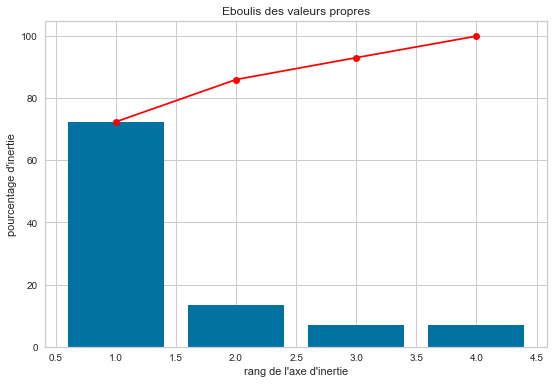

In [25]:
# ACP
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 4

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(features_trans)

# Eboulis des valeurs propres
display_scree_plot(pca)

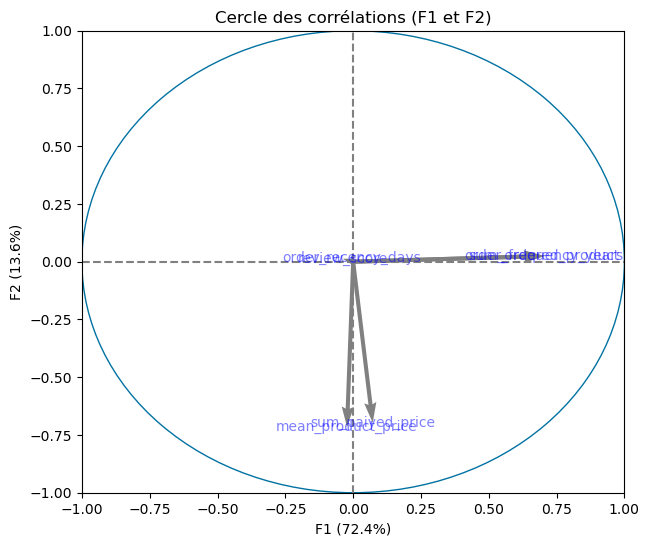

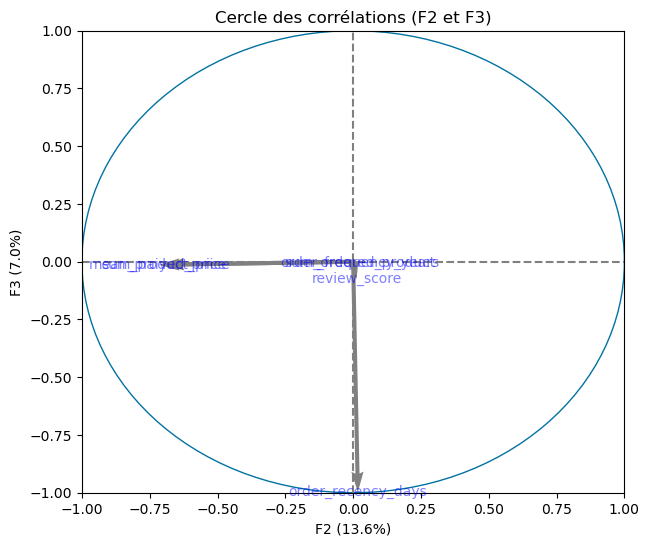

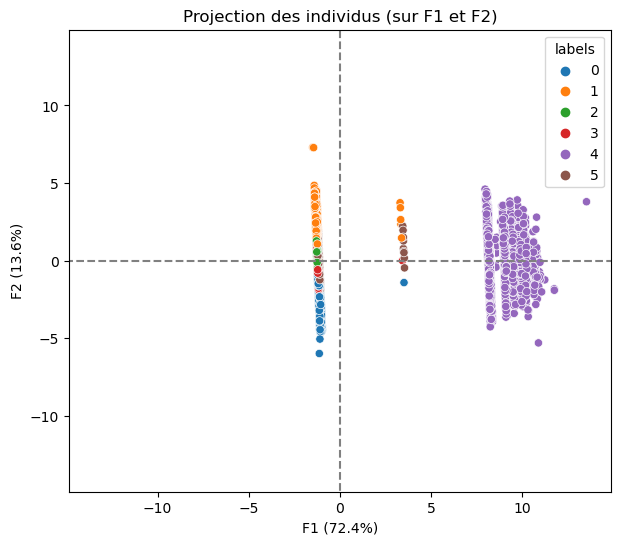

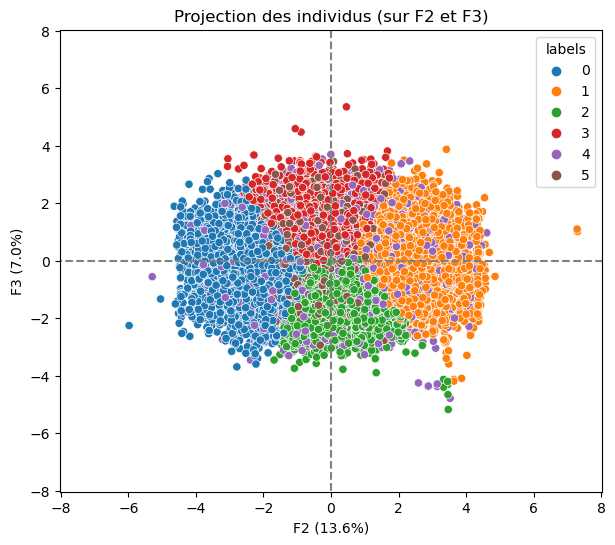

In [26]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1), (1, 2)],
                labels=np.array(features.columns))

# Projection des individus
features_projected = pca.transform(features_trans)
display_factorial_planes(features_projected, n_comp, pca, [(0, 1), (1, 2)],
                         hue_serie=data_km_model['labels'])
plt.show()

In [27]:
# 3D visualisation des projections dans les plans factoriels
from mpl_toolkits import mplot3d
%matplotlib qt
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection="3d")
colors = {0: 'blue',
          1: 'orange',
          2: 'green',
          3: 'red',
          4: 'purple',
          5: 'brown'}
ax.scatter3D(features_projected[:, 0],
             features_projected[:, 1],
             features_projected[:, 2],
             alpha=1,
             c=data_km_model['labels'].map(colors),
             cmap='tab10')
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")
plt.show()

In [28]:
%matplotlib inline

In [29]:
# Visualisation des clusters par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(features_trans)
tsne_plot = data_km_model.copy()
tsne_plot['tsne_2d_1'] = tsne_results[:, 0]
tsne_plot['tsne_2d_2'] = tsne_results[:, 1]

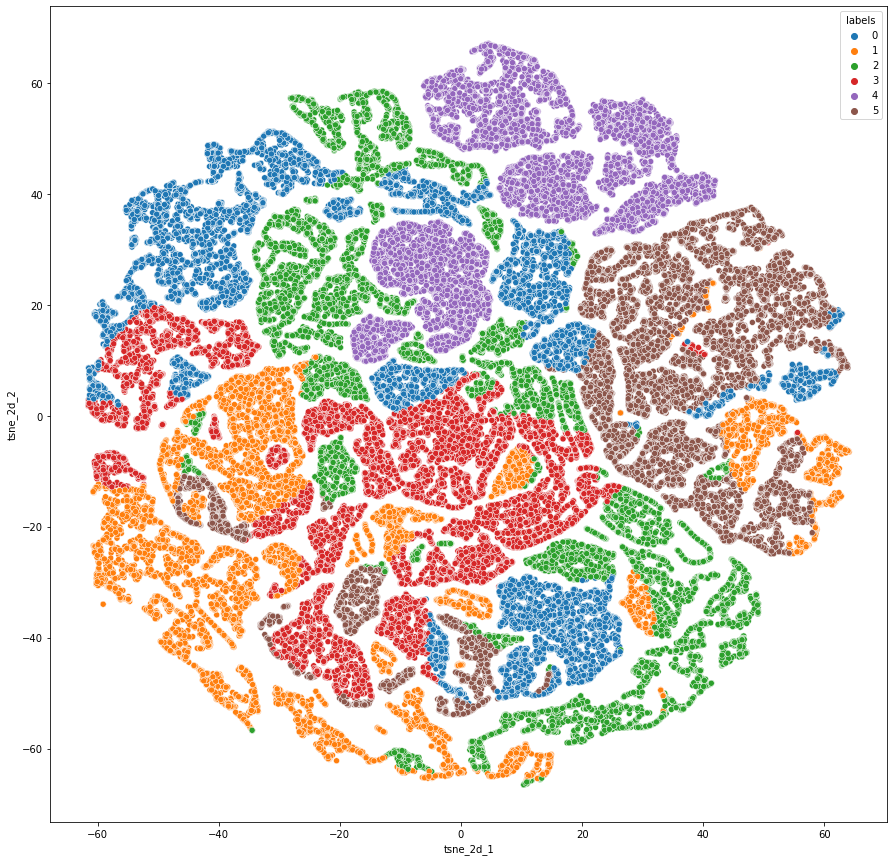

In [30]:
# Plot des samples dans t-SNE plot
plt.figure(figsize=(15, 15))
sns.scatterplot(x="tsne_2d_1", y="tsne_2d_2", hue="labels",
                palette='tab10',
                data=tsne_plot,
                legend="full")
plt.show()

## Modèle DBSCAN

### Estimation paramètres

In [31]:
# Minimum of samples
min_samples = 500

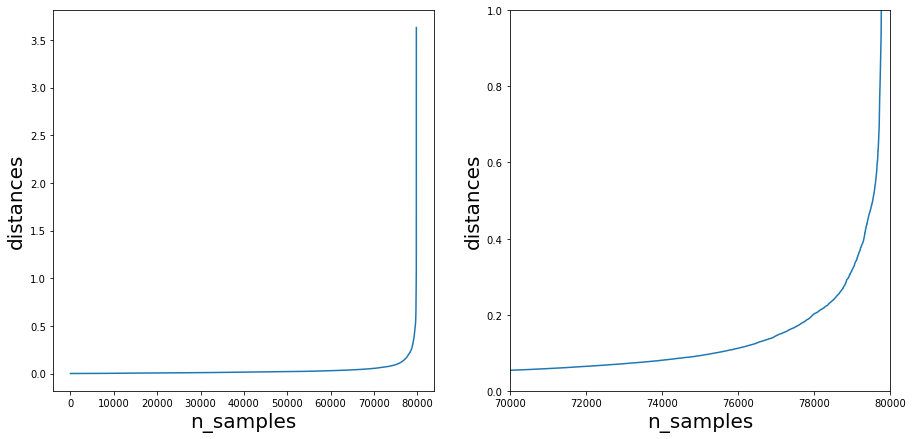

In [32]:
# Estimation de epsilon
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(features_trans)
distances, indices = neighbors_fit.kneighbors(features_trans)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(distances)
plt.ylabel("distances", fontsize=20)
plt.xlabel("n_samples", fontsize=20)
plt.subplot(1, 2, 2)
plt.plot(distances)
plt.ylim([0, 1])
plt.xlim([70000, 80000])
plt.ylabel("distances", fontsize=20)
plt.xlabel("n_samples", fontsize=20)
plt.savefig('distances_nsamples.png', bbox_inches='tight')
plt.show()

### Entraînement modèle

In [33]:
# Entraînement du modèle DBSCAN
from sklearn.cluster import DBSCAN
import time

dbs_model = DBSCAN(min_samples=min_samples,
                   eps=0.4
                   )
begin_time = time.time()
dbs_model.fit(features_trans)
end_time = time.time()
time_fit = "{:.2f}".format(end_time - begin_time)
print(f"Temps de fit : {time_fit} s")

Temps de fit : 19.62 s


In [34]:
# Création d'un dataset avec features et labels
data_dbscan_model = features.copy()
data_dbscan_model['labels'] = dbs_model.labels_

In [35]:
# Calcul du nombres de cluster
len(data_dbscan_model['labels'].value_counts())

4

### Analyse du clustering

In [36]:
# Score du fit
dbscore = db_score(features_trans, dbs_model.labels_)
sil_score = silhouette_score(features_trans, dbs_model.labels_)
display(f"le DB score est de {dbscore}, et le score de silhouette est"
        f" {sil_score}")

'le DB score est de 1.861705914783146, et le score de silhouette est -0.03951641337493946'

In [37]:
# Calcul des valeurs statistiques pour chaque cluster
stat = pd.pivot_table(data_dbscan_model,
                      values=features.columns,
                      index=['labels', 'customer_unique_id'])
for x in data_dbscan_model['labels'].value_counts().index:
    display(stat.loc[x, :].describe())

mean_product_price  order_frequency_years  order_recency_days  \
count        36392.000000           3.639200e+04        36392.000000   
mean           104.768592           6.684982e-01          205.521121   
std             84.350838           3.911369e-13          127.187323   
min             14.000000           6.684982e-01            4.505405   
25%             47.000000           6.684982e-01           96.517856   
50%             79.990000           6.684982e-01          193.976302   
75%            135.992500           6.684982e-01          302.355888   
max            599.990000           6.684982e-01          506.538889   

       review_score  sum_ordered_product  sum_paiyed_price  
count       36392.0              36392.0      36392.000000  
mean            5.0                  1.0        104.768592  
std             0.0                  0.0         84.350838  
min             5.0                  1.0         14.000000  
25%             5.0                  1.0         47.000000  
50%             5.0                  1.0         79.990000  
75%             5.0                  1.0        135.992500  
max             5.0                  1.0        599.990000

mean_product_price  order_frequency_years  order_recency_days  \
count        32738.000000           32738.000000        32738.000000   
mean           160.575181               0.964705          215.980821   
std            275.078031               0.606884          156.402726   
min              0.850000               0.668498            0.000127   
25%             32.000000               0.668498           77.532370   
50%             69.900000               0.668498          196.497575   
75%            166.990000               1.336996          342.356765   
max           6735.000000              14.038461          541.502708   

       review_score  sum_ordered_product  sum_paiyed_price  
count  32738.000000         32738.000000      32738.000000  
mean       3.366093             1.444193        199.340524  
std        1.459402             0.909614        311.565655  
min        1.000000             1.000000          0.850000  
25%        2.000000             1.000000         39.990000  
50%        4.000000             1.000000        105.000000  
75%        5.000000             2.000000        224.897500  
max        5.000000            21.000000      13440.000000

mean_product_price  order_frequency_years  order_recency_days  \
count         8433.000000           8.433000e+03         8433.000000   
mean            90.088203           6.684982e-01          199.734429   
std             45.701438           1.394523e-13          100.460865   
min             24.900000           6.684982e-01           31.495231   
25%             53.900000           6.684982e-01          116.584884   
50%             79.900000           6.684982e-01          192.467373   
75%            119.900000           6.684982e-01          272.989444   
max            235.000000           6.684982e-01          438.283137   

       review_score  sum_ordered_product  sum_paiyed_price  
count        8433.0               8433.0       8433.000000  
mean            4.0                  1.0         90.088203  
std             0.0                  0.0         45.701438  
min             4.0                  1.0         24.900000  
25%             4.0                  1.0         53.900000  
50%             4.0                  1.0         79.900000  
75%             4.0                  1.0        119.900000  
max             4.0                  1.0        235.000000

mean_product_price  order_frequency_years  order_recency_days  \
count         2221.000000           2.221000e+03         2221.000000   
mean            92.328352           6.684982e-01          147.597370   
std             30.939770           5.108176e-15           44.723572   
min             44.900000           6.684982e-01           66.665556   
25%             69.000000           6.684982e-01          114.176354   
50%             89.660000           6.684982e-01          136.572373   
75%            115.000000           6.684982e-01          181.303877   
max            169.990000           6.684982e-01          265.326736   

       review_score  sum_ordered_product  sum_paiyed_price  
count   2221.000000               2221.0       2221.000000  
mean       1.194507                  1.0         92.328352  
std        0.395910                  0.0         30.939770  
min        1.000000                  1.0         44.900000  
25%        1.000000                  1.0         69.000000  
50%        1.000000                  1.0         89.660000  
75%        1.000000                  1.0        115.000000  
max        2.000000                  1.0        169.990000

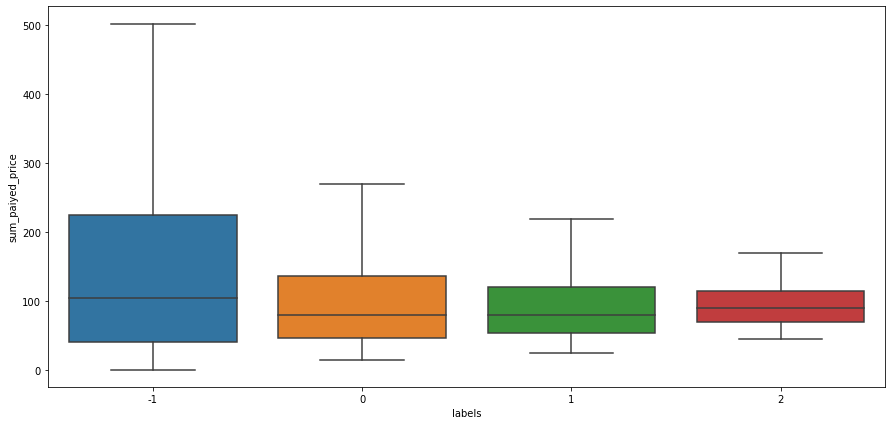

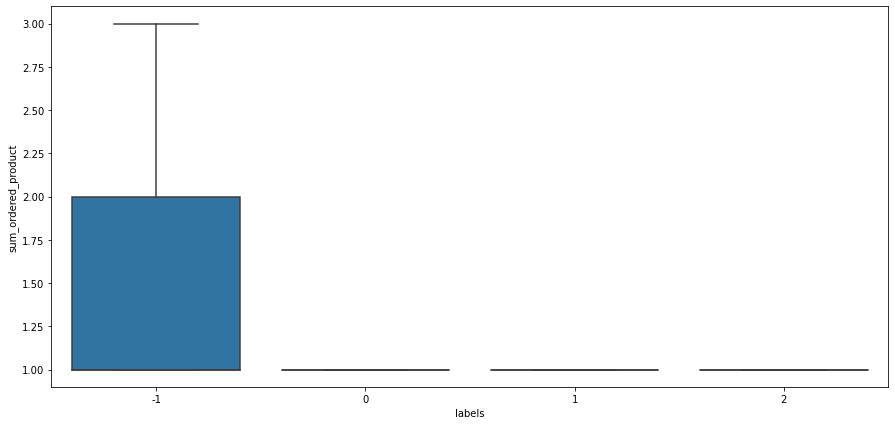

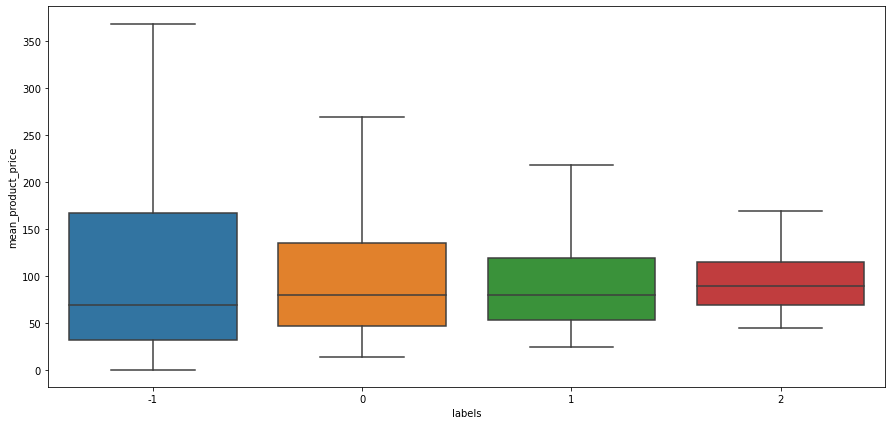

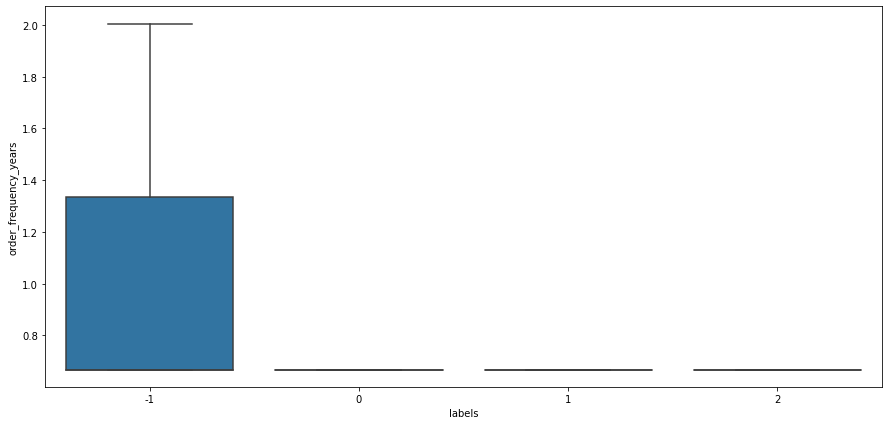

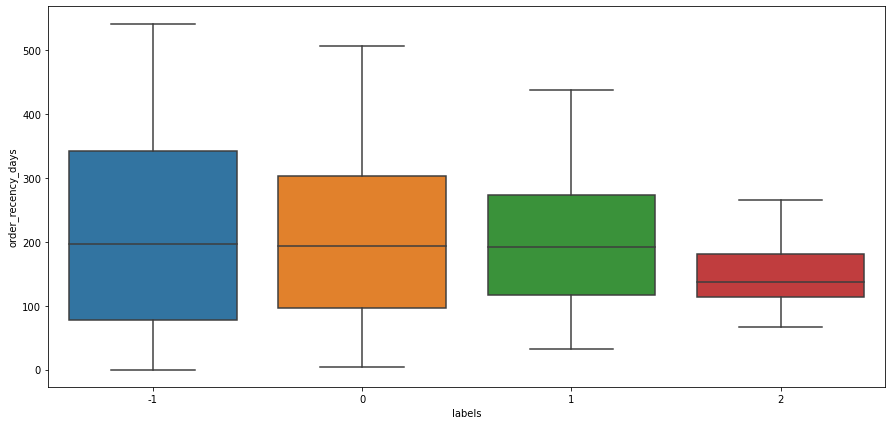

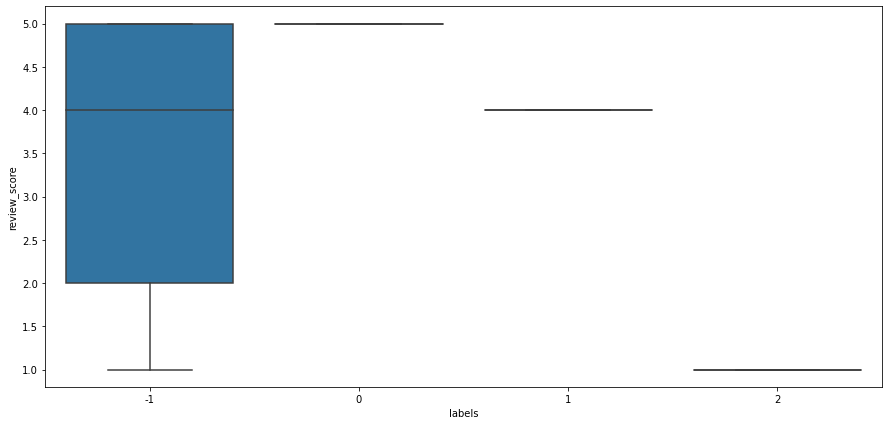

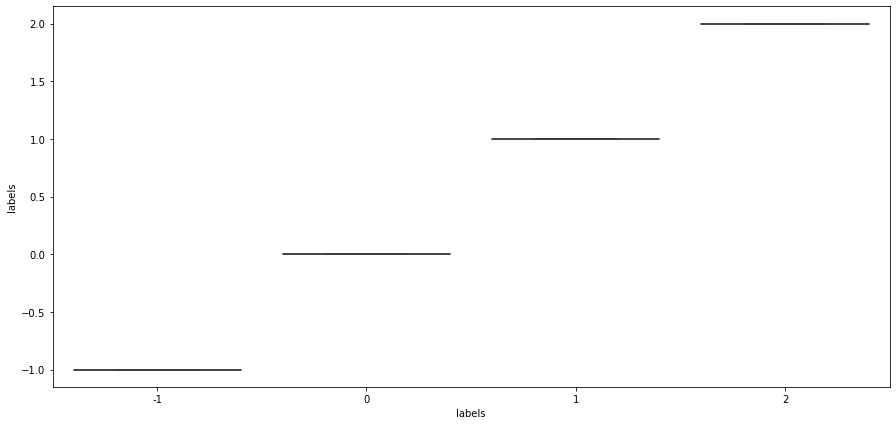

In [38]:
# Représentations graphiques des features en fonctions des clusters
for col in data_dbscan_model.columns.to_list():
    plt.figure(figsize=(15, 7))
    sns.boxplot(y=col, x='labels', data=data_dbscan_model,
                showfliers=False)
    plt.show()

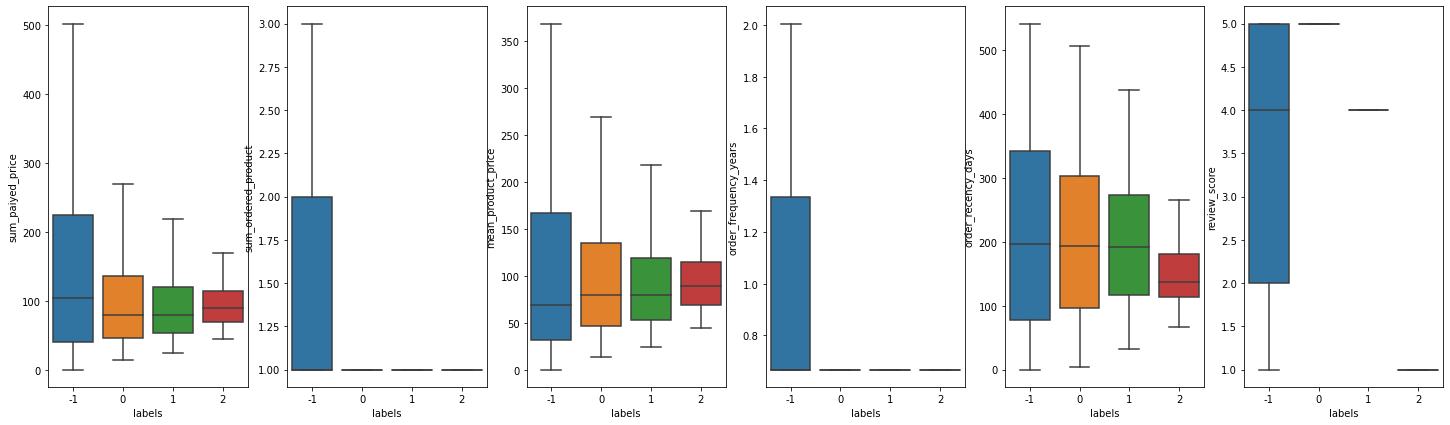

In [39]:
# Visualisation graphique features selon les labels
plt.figure(figsize=(25, 7))
for col, x in zip(data_dbscan_model.columns,
                  range(1, len(data_dbscan_model.columns))):
    plt.subplot(1, len(data_dbscan_model.columns) - 1, x)
    sns.boxplot(y=col, x='labels',
                data=data_dbscan_model, showfliers=False)
plt.savefig(f"dbscan_box_{col}_2.png", bbox_inches="tight")
plt.show()

C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases late

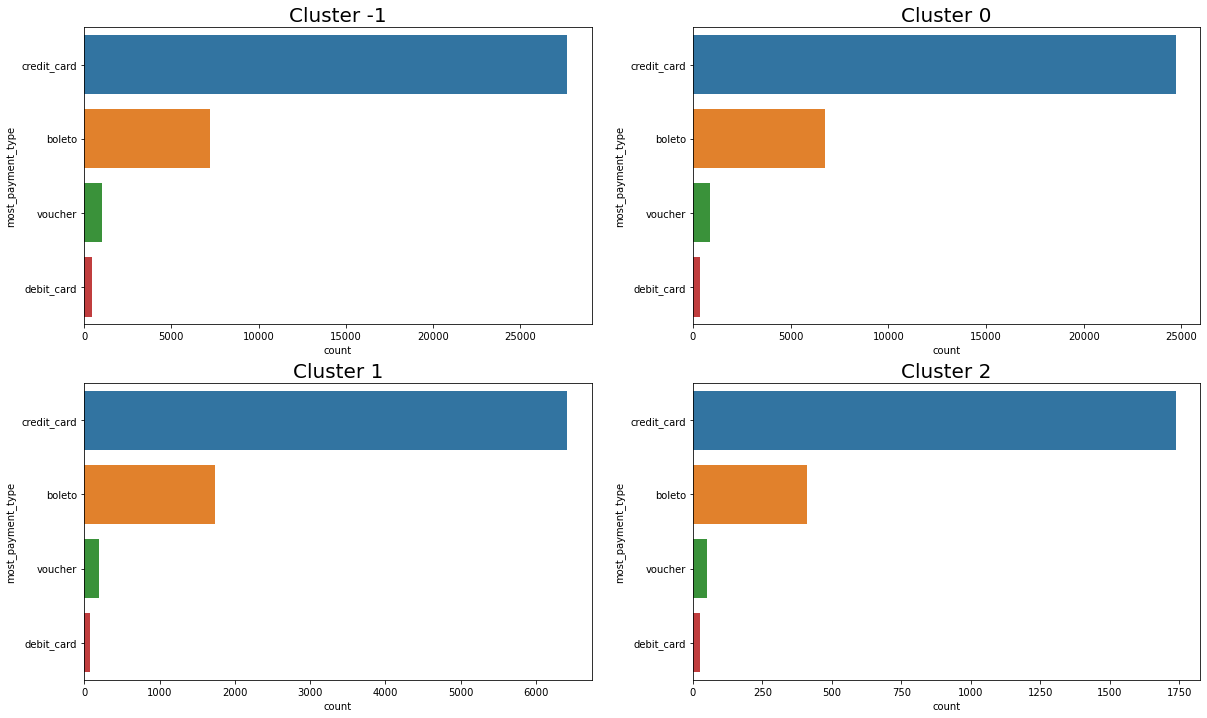

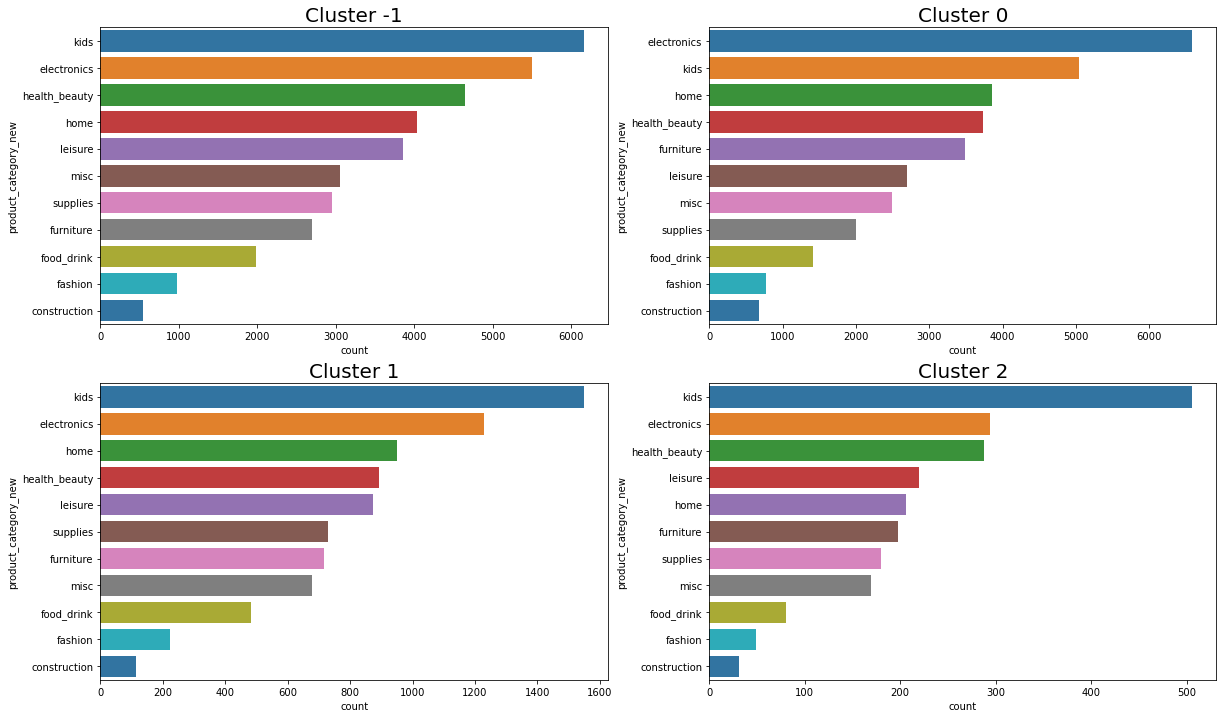

In [40]:
# Analyse des différentes catégories dans les labels
index_tot = [data_dbscan_model[data_dbscan_model['labels'] == x].index
             for x in data_dbscan_model['labels'].value_counts().index]

plt.figure(figsize=(20, 12))
for x in range(len(index_tot)):
    order = data_agg_4.loc[index_tot[x], 'most_payment_type'].value_counts()
    order_hue = order.index
    plt.subplot(2, len(index_tot)/2, x+1)
    sns.countplot(y=data_agg_4.loc[index_tot[x], 'most_payment_type'],
                  order=order_hue,
                  palette='tab10')
    plt.title(f"Cluster {x - 1}", fontsize=20)
plt.savefig(f"most_payment_type_cluster_dbs.png", bbox_inches="tight")

plt.figure(figsize=(20, 12))
for x in range(len(index_tot)):
    order = data_agg_4.loc[index_tot[x], 'product_category_new'].value_counts()
    order_hue = order.index
    plt.subplot(2, len(index_tot)/2, x+1)
    sns.countplot(y=data_agg_4.loc[index_tot[x], 'product_category_new'],
                  order=order_hue,
                  palette='tab10')
    plt.title(f"Cluster {x - 1}", fontsize=20)
plt.savefig(f"product_category_cluster_dbs.png", bbox_inches="tight")

### Visualisation graphique

In [41]:
# ACP
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 3

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(features_trans)

PCA(n_components=3)

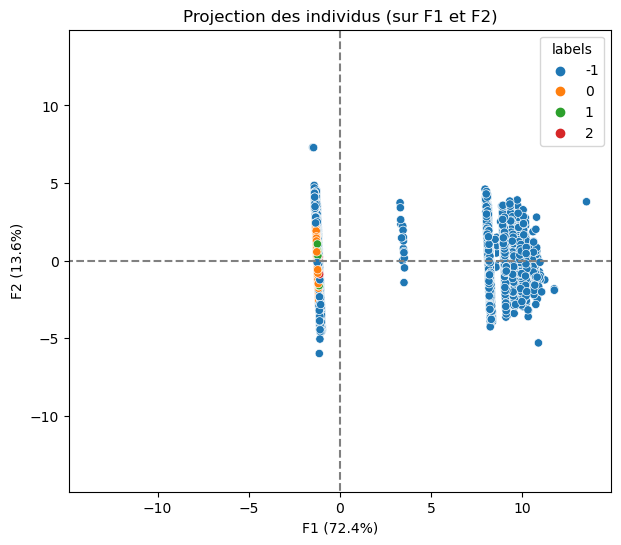

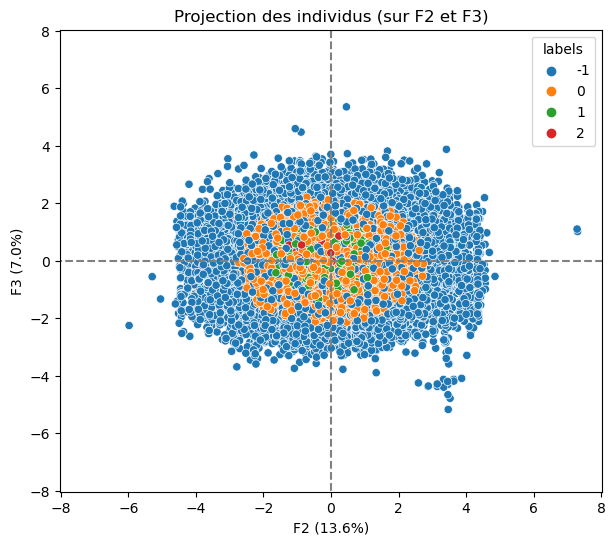

In [42]:
# Projection des individus ACP
features_projected = pca.transform(features_trans)
display_factorial_planes(features_projected, n_comp, pca,
                         [(0, 1), (1, 2)],
                         hue_serie=data_dbscan_model['labels'])

plt.show()

In [43]:
# Visualisation des clusters par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(features_trans)
tsne_plot = data_dbscan_model.copy()
tsne_plot['tsne_2d_1'] = tsne_results[:, 0]
tsne_plot['tsne_2d_2'] = tsne_results[:, 1]

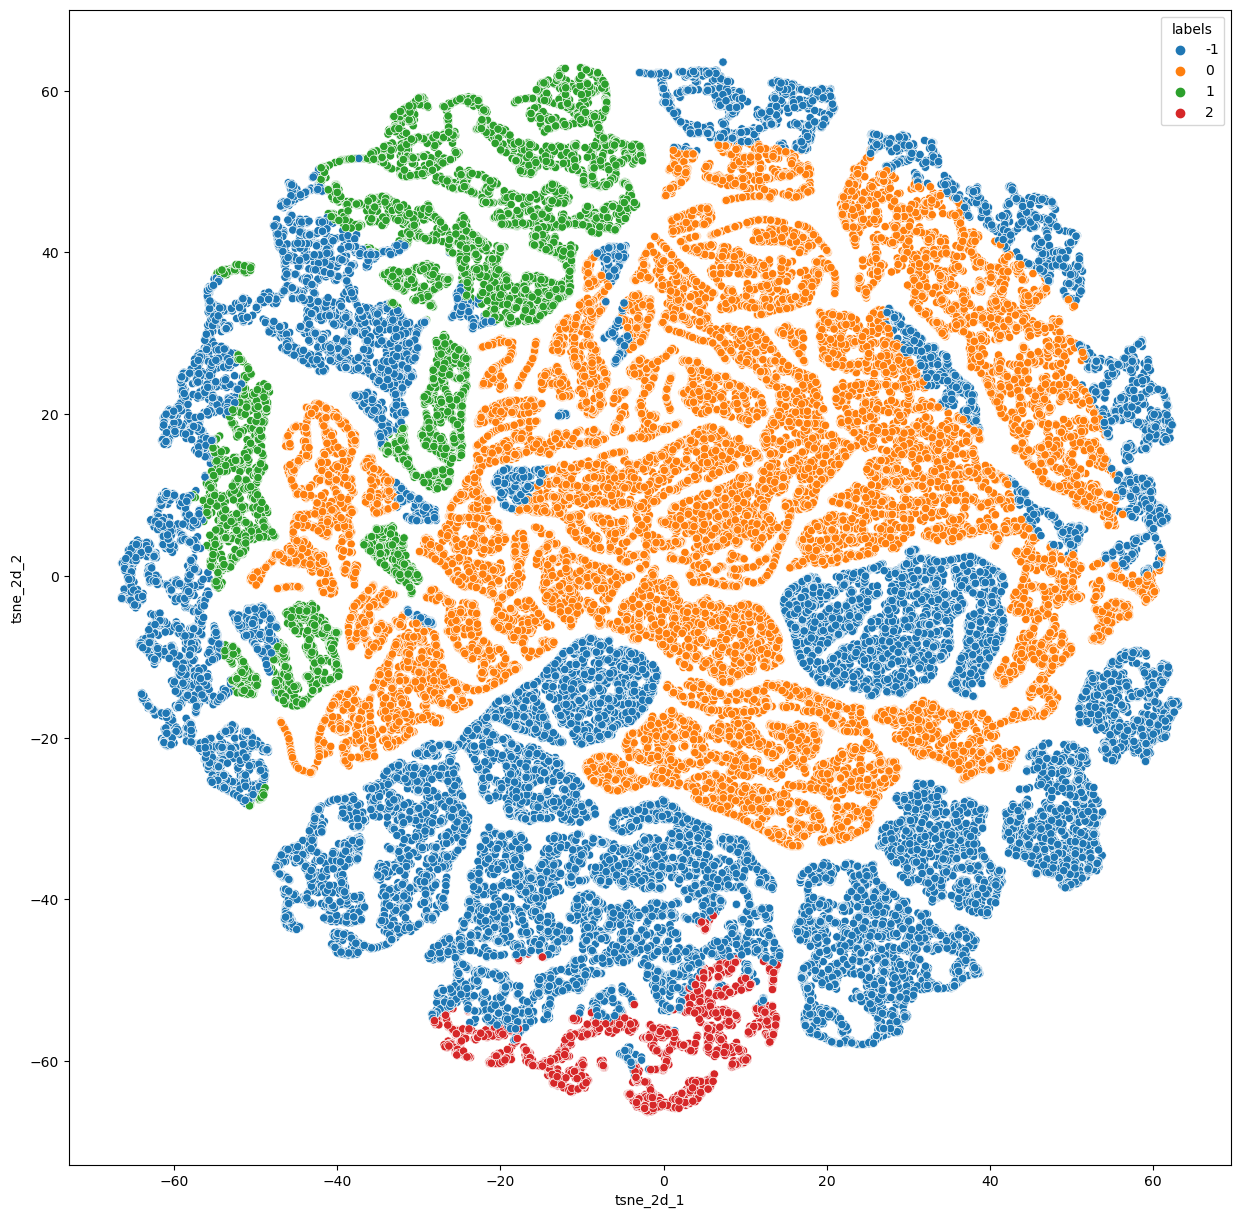

In [44]:
# Plot des samples dans t-SNE plot

plt.figure(figsize=(15, 15))
sns.scatterplot(x="tsne_2d_1", y="tsne_2d_2", hue="labels",
                palette='tab10',
                data=tsne_plot,
                legend="full")
plt.savefig('tsne_dbscan.png', bbox_inches='tight')
plt.show()

## Modèle Hierarchique

### Détermination des k

In [45]:
# Sample des features pour test du modèle (impossible sur tout le dataset)
list_features
features_samp = data_agg_4[list_features]
features = features_samp.sample(frac=0.1, random_state=5)
features_trans = preprocessor.fit_transform(features)

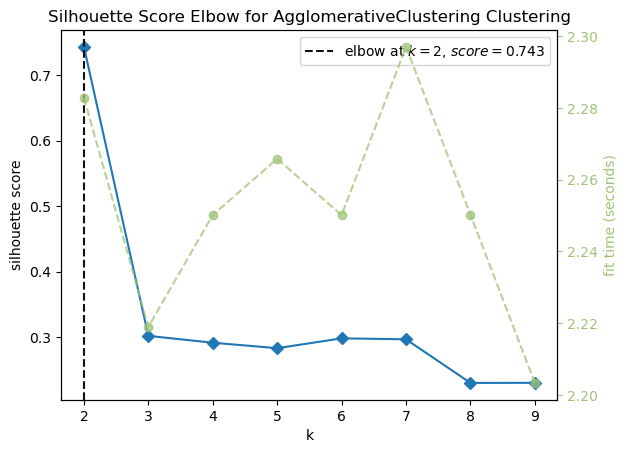

<Figure size 1500x700 with 0 Axes>

In [46]:
# Instantiate the clustering model and visualizer
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')

visualizer.fit(features_trans)    # Fit the data to the visualizer
plt.figure(figsize=(15, 7))
visualizer.poof()    # Draw/show/poof the data
plt.show()

In [47]:
# Recherche du nombre idéal de cluster - Elbow
from sklearn.cluster import AgglomerativeClustering

db_scores = []
k_range = range(1, 10)
for k in k_range:
    ag_model = AgglomerativeClustering(n_clusters=k)
    ag_model.fit(features_trans)
    if k >= 2:
        db_scores.append(db_score(features_trans, ag_model.labels_))

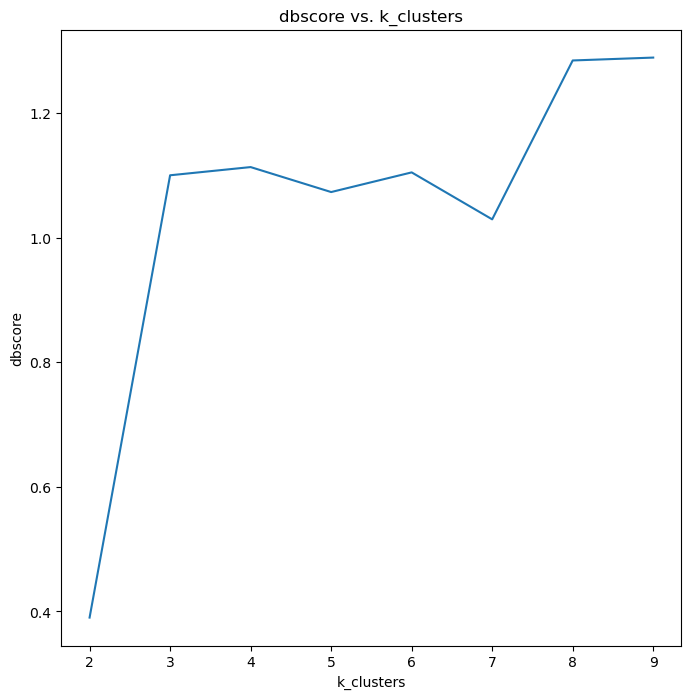

In [48]:
# Représentation graphique des scores en fonction du nombres de clusters
plt.figure(figsize=(8, 8))
plt.plot(range(2, 10), db_scores)
plt.title("dbscore vs. k_clusters")
plt.xlabel("k_clusters")
plt.ylabel("dbscore")
plt.show()

### Entraînement 

In [49]:
# Entraînement avec le nombre k de cluster
import time

ag_model = AgglomerativeClustering(n_clusters=6)
begin_time = time.time()
ag_model.fit(features_trans)
end_time = time.time()
time_fit = "{:.2f}".format(end_time - begin_time)
print(f"Temps de fit : {time_fit} s")

Temps de fit : 2.24 s


In [50]:
# Création d'un dataset avec features et label
data_ag_model = features.copy()
data_ag_model['labels'] = ag_model.labels_

### Analyse du clustering

In [51]:
# Score du fit
dbscore = db_score(features_trans, ag_model.labels_)
sil_score = silhouette_score(features_trans, ag_model.labels_)
display(f"le DB score est de {dbscore}, et le score de silhouette est"
        f" {sil_score}")

'le DB score est de 1.104974848380856, et le score de silhouette est 0.29802971238662584'

In [52]:
# Calcul des valeurs statistiques pour chaque cluster
stat = pd.pivot_table(data_ag_model,
                      values=features.columns,
                      index=['labels', 'customer_unique_id'])
for x in data_ag_model['labels'].value_counts().index:
    display(stat.loc[x, :].describe())

mean_product_price  order_frequency_years  order_recency_days  \
count         1638.000000           1.638000e+03         1638.000000   
mean           251.500324           6.684982e-01          292.791679   
std            314.243732           4.997529e-15          115.310063   
min             49.000000           6.684982e-01            3.167708   
25%             99.000000           6.684982e-01          210.610229   
50%            147.950000           6.684982e-01          285.794392   
75%            249.900000           6.684982e-01          381.347896   
max           2999.990000           6.684982e-01          537.096736   

       review_score  sum_ordered_product  sum_paiyed_price  
count   1638.000000               1638.0       1638.000000  
mean       4.952991                  1.0        251.500324  
std        0.331027                  0.0        314.243732  
min        1.000000                  1.0         49.000000  
25%        5.000000                  1.0         99.000000  
50%        5.000000                  1.0        147.950000  
75%        5.000000                  1.0        249.900000  
max        5.000000                  1.0       2999.990000

mean_product_price  order_frequency_years  order_recency_days  \
count         1426.000000           1.426000e+03         1426.000000   
mean           110.582237           6.684982e-01           73.517549   
std             65.170354           4.997756e-15           54.803826   
min             15.900000           6.684982e-01            0.131875   
25%             67.885000           6.684982e-01           27.679766   
50%             94.180000           6.684982e-01           61.700579   
75%            139.150000           6.684982e-01          105.093990   
max            560.000000           6.684982e-01          229.527801   

       review_score  sum_ordered_product  sum_paiyed_price  
count   1426.000000               1426.0       1426.000000  
mean       4.889201                  1.0        110.582237  
std        0.405656                  0.0         65.170354  
min        1.000000                  1.0         15.900000  
25%        5.000000                  1.0         67.885000  
50%        5.000000                  1.0         94.180000  
75%        5.000000                  1.0        139.150000  
max        5.000000                  1.0        560.000000

mean_product_price  order_frequency_years  order_recency_days  \
count         1377.000000           1.377000e+03         1377.000000   
mean            45.865330           6.684982e-01          187.210989   
std             23.065875           4.997819e-15          120.907943   
min              5.180000           6.684982e-01            0.536181   
25%             27.990000           6.684982e-01           89.375046   
50%             44.000000           6.684982e-01          168.496910   
75%             59.900000           6.684982e-01          270.435428   
max            110.000000           6.684982e-01          539.975845   

       review_score  sum_ordered_product  sum_paiyed_price  
count   1377.000000          1377.000000       1377.000000  
mean       3.076979             1.001452         45.865330  
std        1.170073             0.038097         23.065875  
min        1.000000             1.000000          5.180000  
25%        2.000000             1.000000         27.990000  
50%        4.000000             1.000000         44.000000  
75%        4.000000             1.000000         59.900000  
max        4.000000             2.000000        110.000000

mean_product_price  order_frequency_years  order_recency_days  \
count         1274.000000           1.274000e+03         1274.000000   
mean            33.396476           6.684982e-01          239.488209   
std             13.592909           4.886900e-15          130.769614   
min              3.900000           6.684982e-01            5.051771   
25%             21.990000           6.684982e-01          139.391600   
50%             33.000000           6.684982e-01          218.084821   
75%             44.900000           6.684982e-01          335.672040   
max             69.900000           6.684982e-01          535.465359   

       review_score  sum_ordered_product  sum_paiyed_price  
count   1274.000000               1274.0       1274.000000  
mean       4.998430                  1.0         33.396476  
std        0.056033                  0.0         13.592909  
min        3.000000                  1.0          3.900000  
25%        5.000000                  1.0         21.990000  
50%        5.000000                  1.0         33.000000  
75%        5.000000                  1.0         44.900000  
max        5.000000                  1.0         69.900000

mean_product_price  order_frequency_years  order_recency_days  \
count         1249.000000           1.249000e+03         1249.000000   
mean           194.440352           6.684982e-01          241.362978   
std            180.364572           4.886938e-15          137.544197   
min             32.900000           6.684982e-01            3.255197   
25%             99.990000           6.684982e-01          125.524549   
50%            139.970000           6.684982e-01          212.233738   
75%            219.990000           6.684982e-01          359.954190   
max           1890.000000           6.684982e-01          540.105683   

       review_score  sum_ordered_product  sum_paiyed_price  
count   1249.000000               1249.0       1249.000000  
mean       2.692554                  1.0        194.440352  
std        1.269066                  0.0        180.364572  
min        1.000000                  1.0         32.900000  
25%        1.000000                  1.0         99.990000  
50%        3.000000                  1.0        139.970000  
75%        4.000000                  1.0        219.990000  
max        4.000000                  1.0       1890.000000

mean_product_price  order_frequency_years  order_recency_days  \
count         1014.000000            1014.000000         1014.000000   
mean            89.276624               1.664653          206.247718   
std             85.245046               0.871438          141.080111   
min              3.900000               1.336996            1.334838   
25%             38.600000               1.336996           92.575454   
50%             64.583333               1.336996          179.597095   
75%            109.900000               1.336996          305.080883   
max           1260.000000              13.369963          541.428275   

       review_score  sum_ordered_product  sum_paiyed_price  
count   1014.000000          1014.000000       1014.000000  
mean       3.708189             2.492110        217.139428  
std        1.550091             1.304346        233.500793  
min        1.000000             2.000000          7.800000  
25%        3.000000             2.000000         89.932500  
50%        4.000000             2.000000        150.000000  
75%        5.000000             2.000000        259.735000  
max        5.000000            20.000000       2520.000000

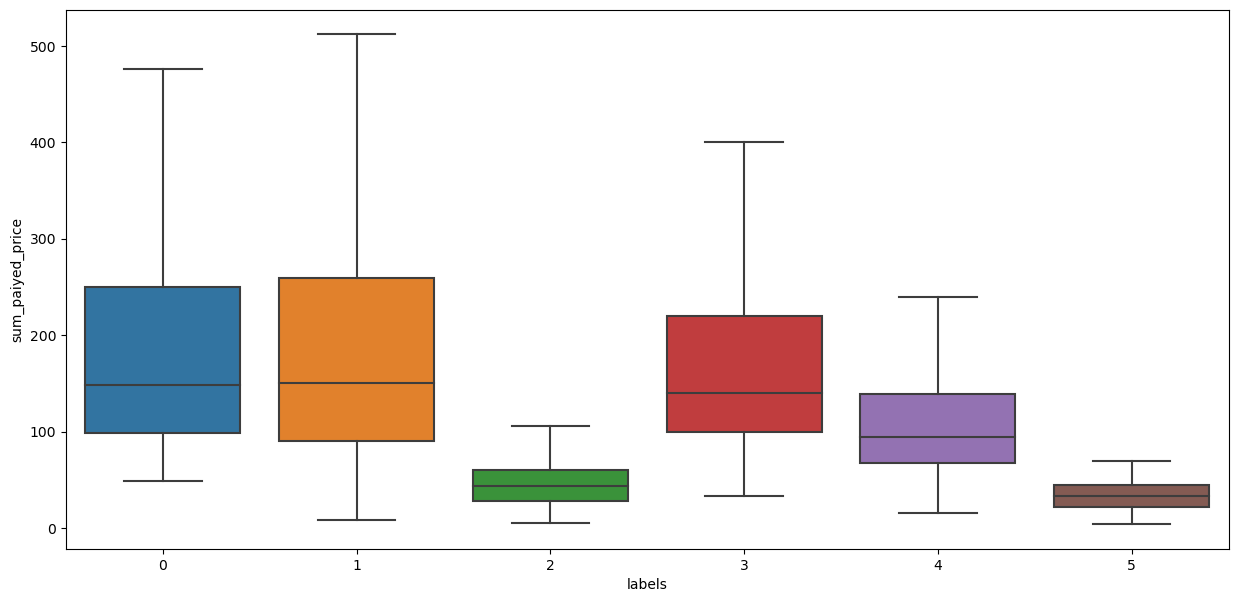

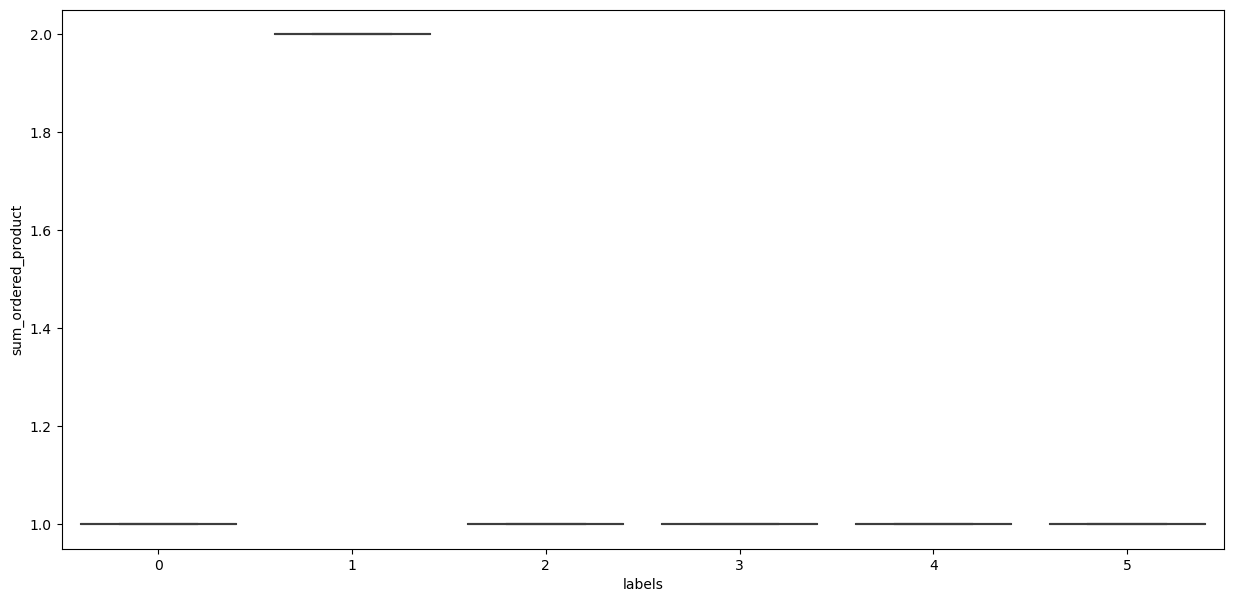

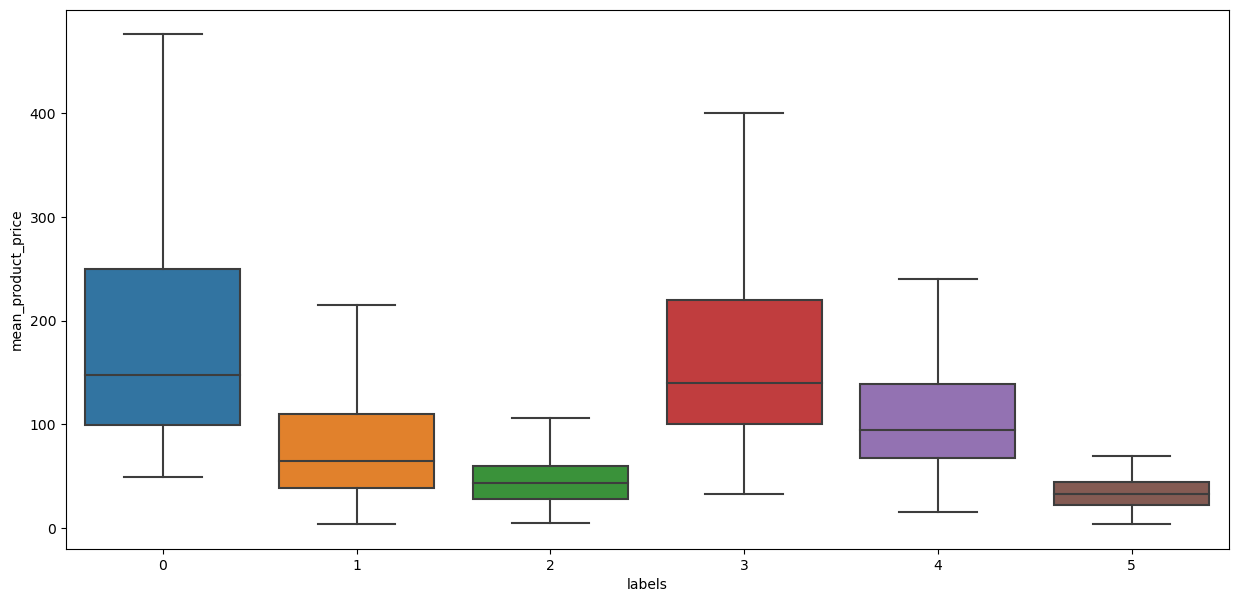

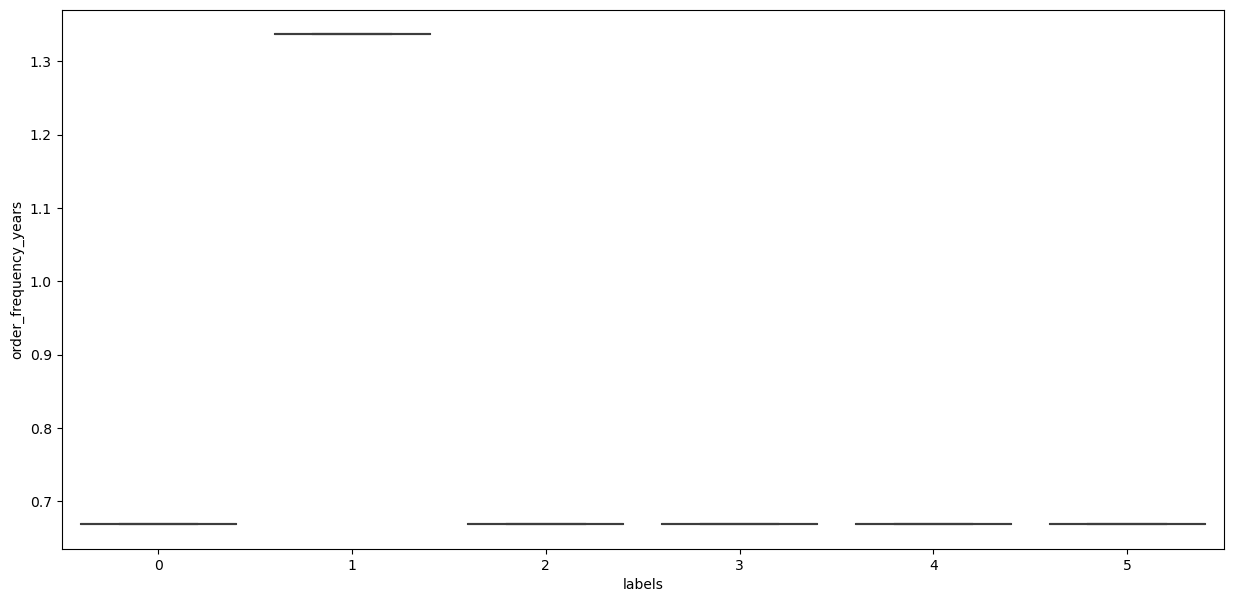

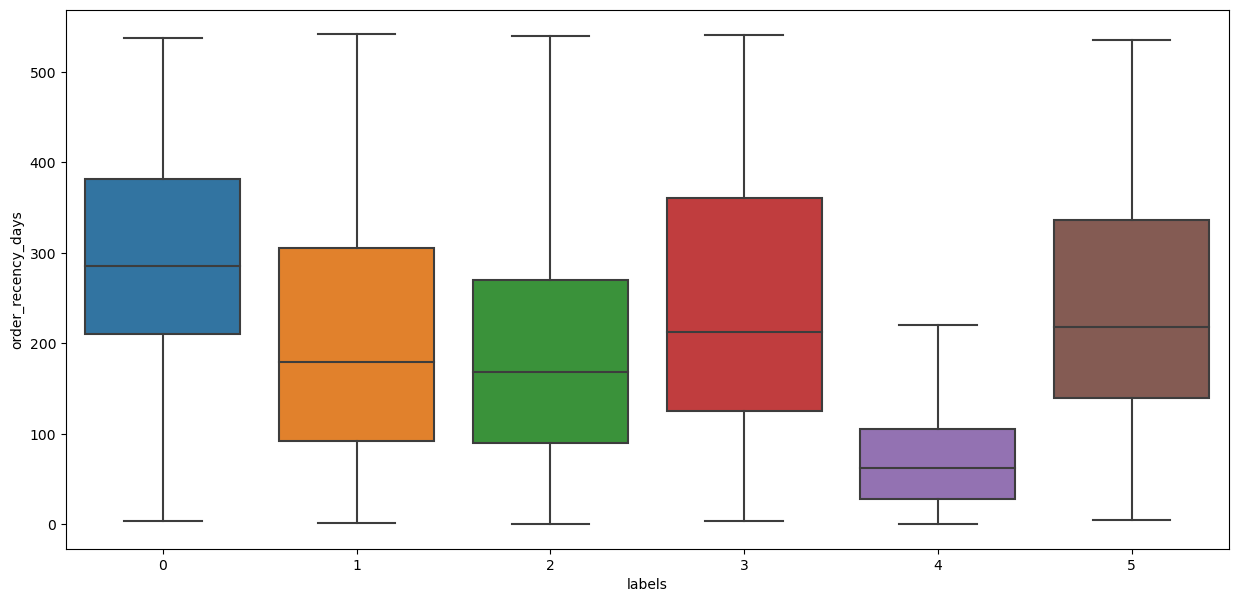

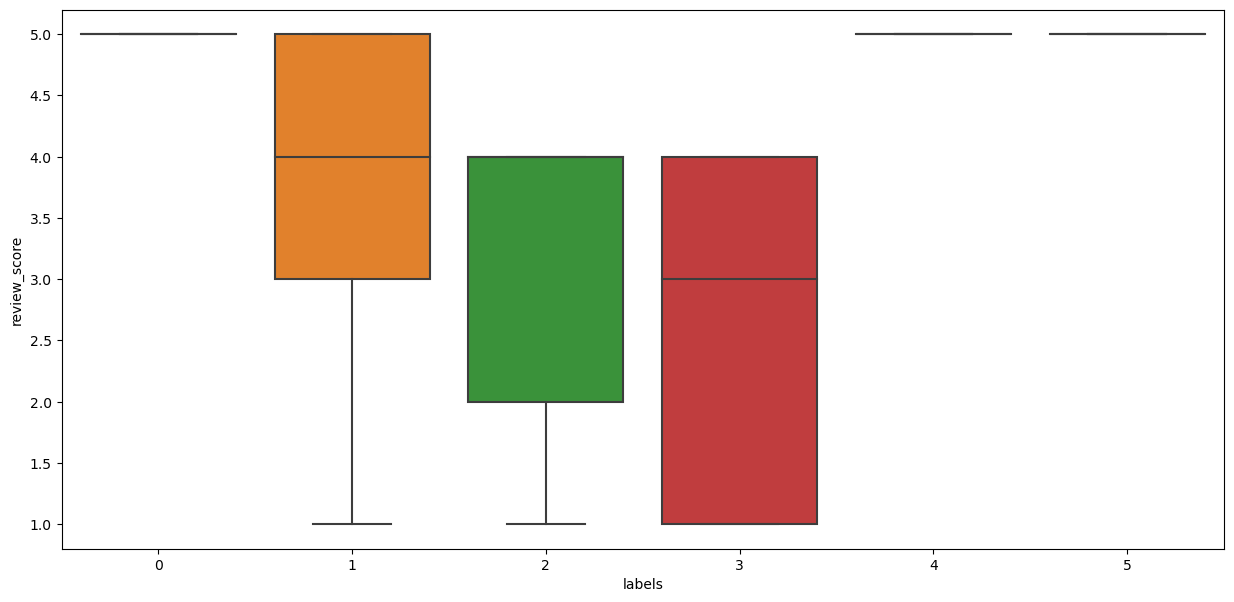

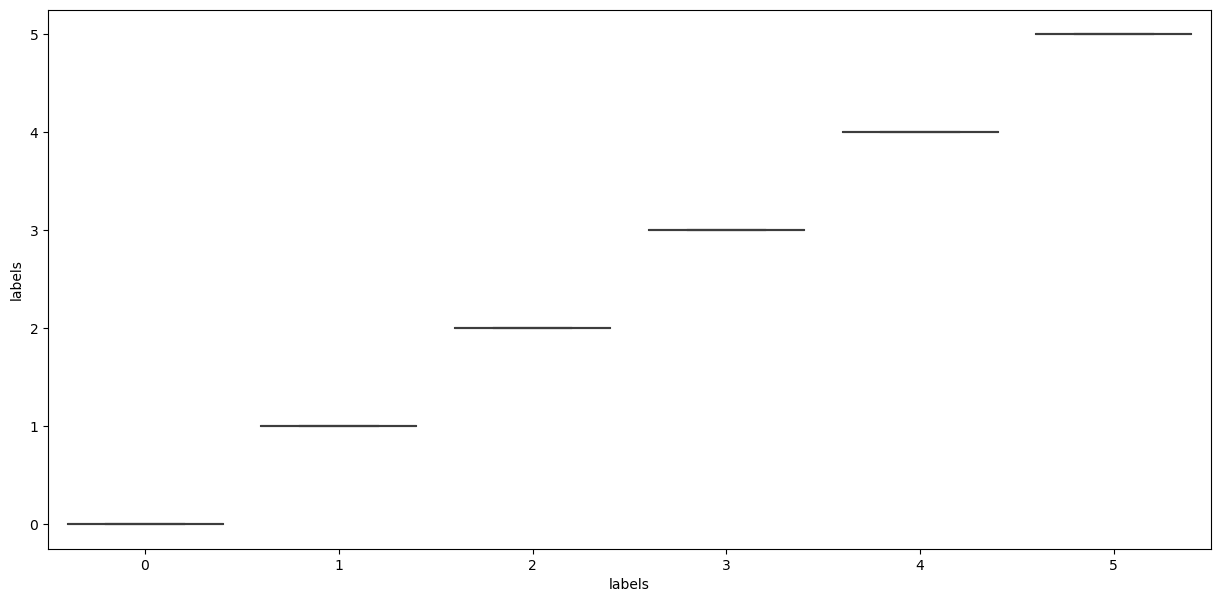

In [53]:
# Représentation graphique des features pour chaque cluster
for col in data_ag_model.columns.to_list():
    plt.figure(figsize=(15, 7))
    sns.boxplot(y=col, x='labels', data=data_ag_model,
                showfliers=False)
    plt.show()

C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
C:\Users\ilyas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases late

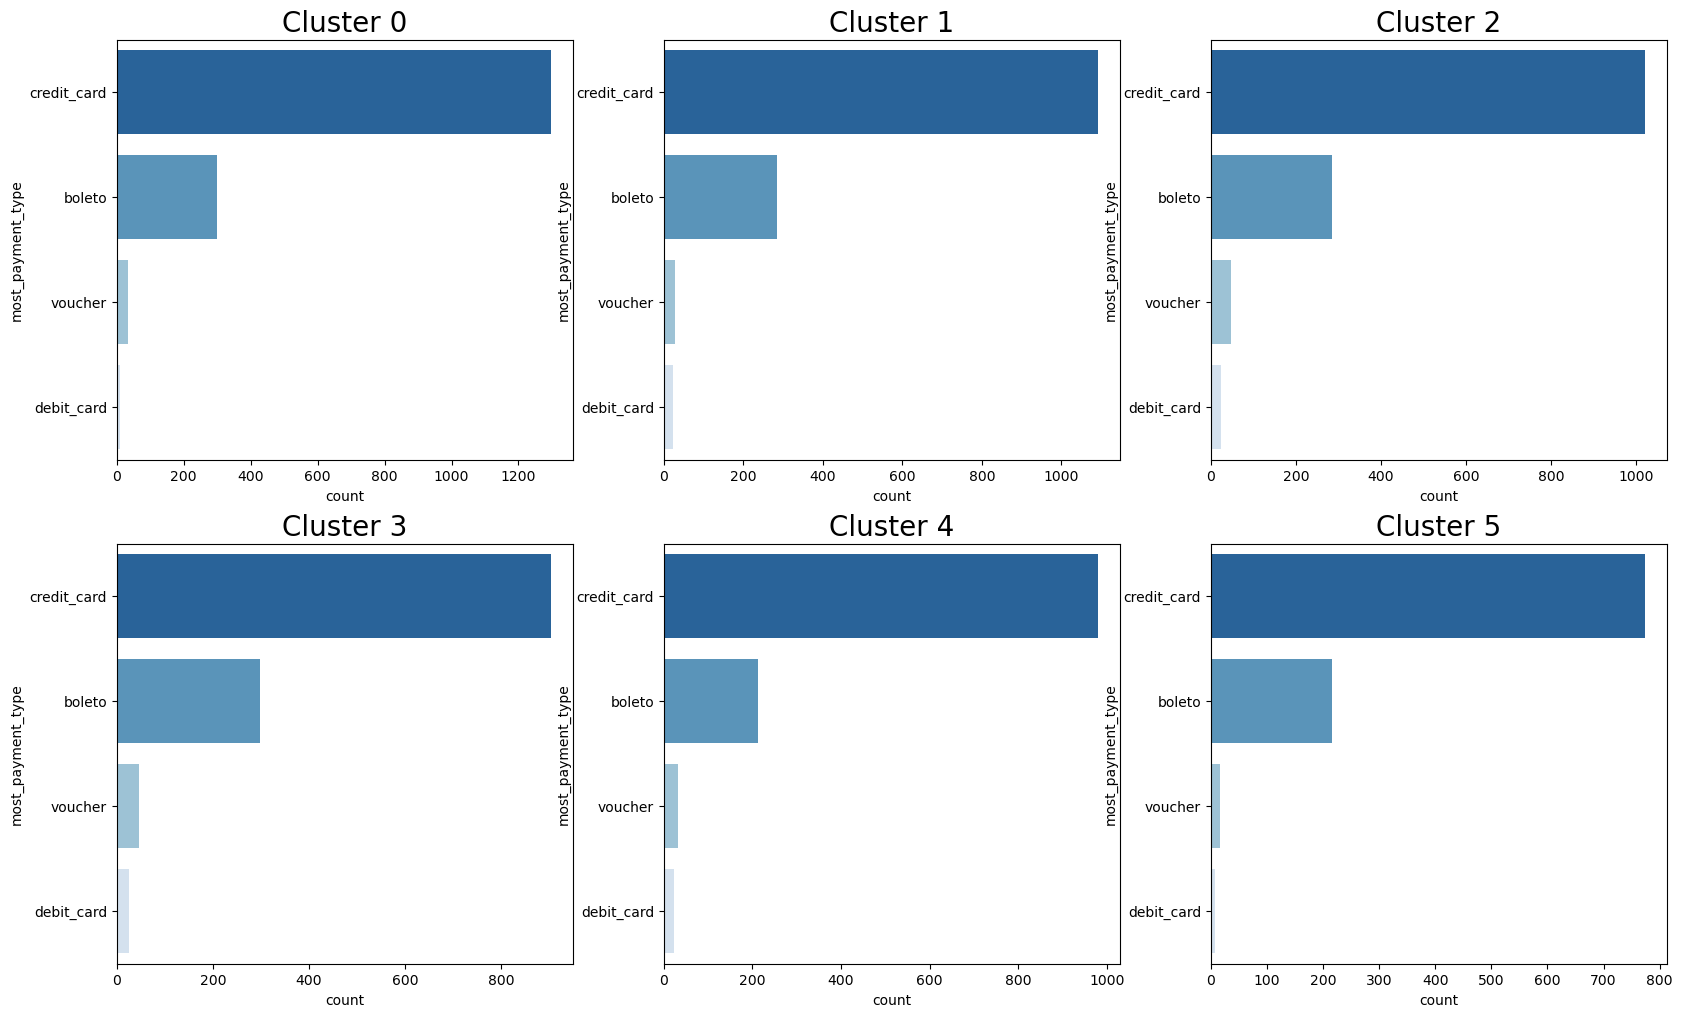

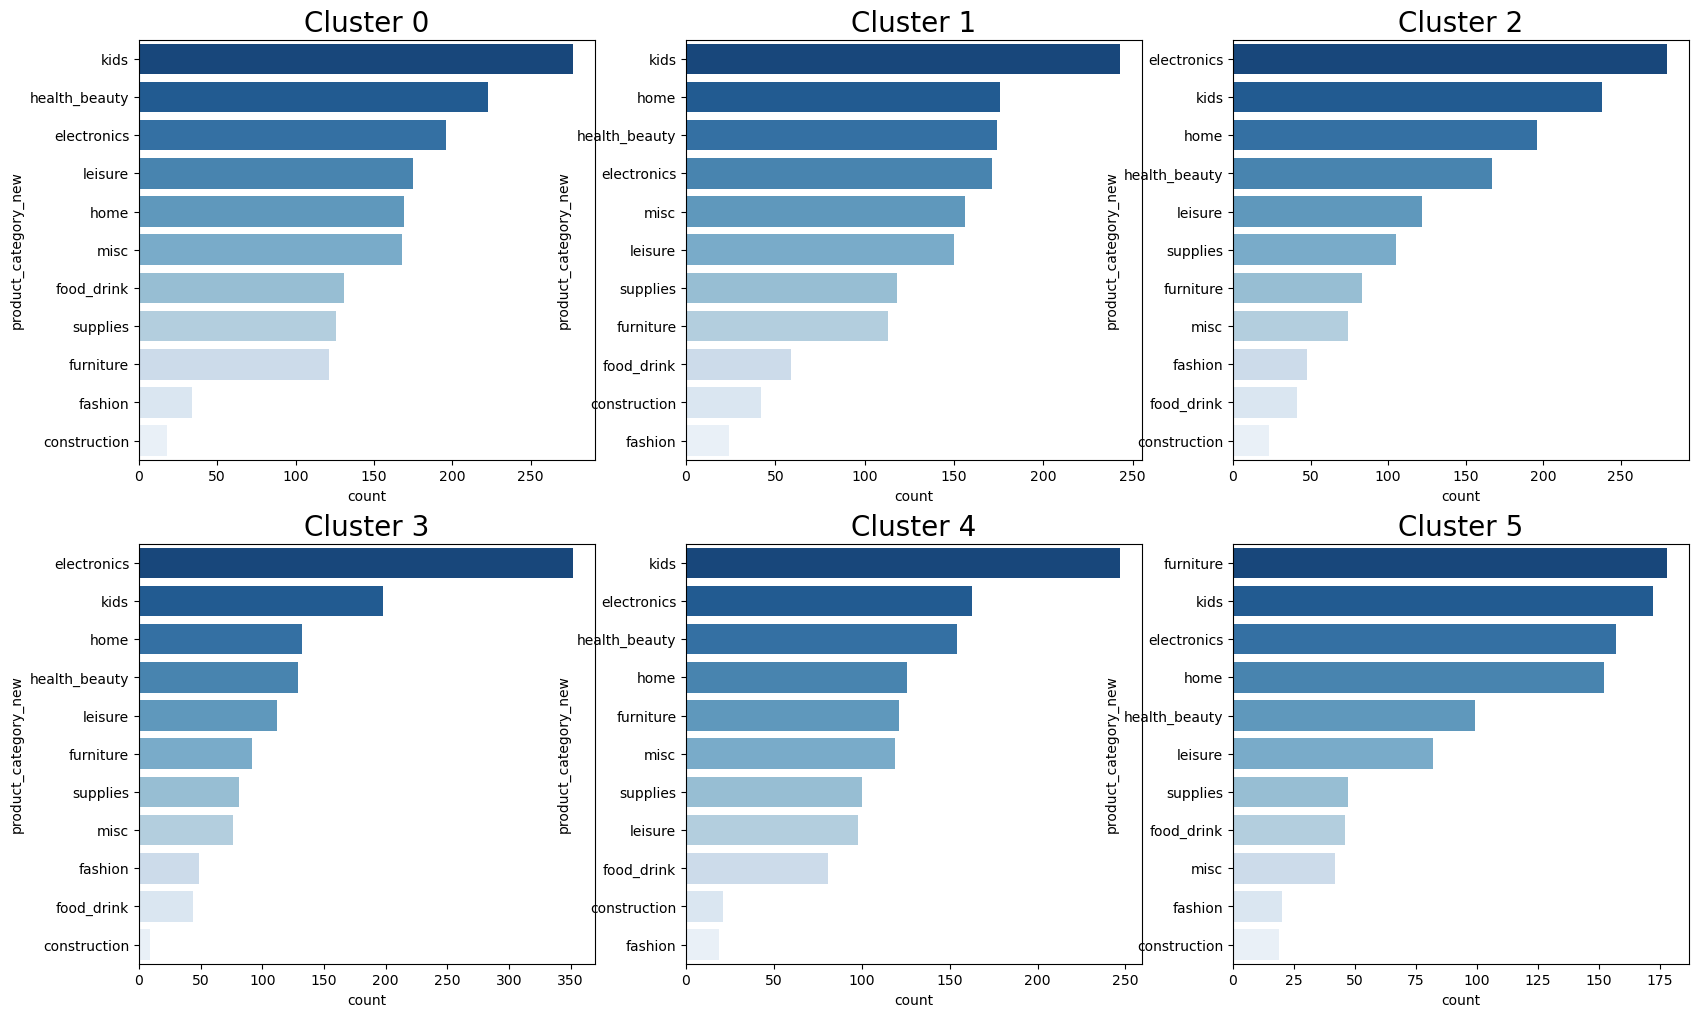

In [54]:
# Analyse des différentes catégories dans les labels
index_tot = [data_ag_model[data_ag_model['labels'] == x].index
             for x in data_ag_model['labels'].value_counts().index]

plt.figure(figsize=(20, 12))
for x in range(len(index_tot)):
    order = data_agg_4.loc[index_tot[x], 'most_payment_type'].value_counts()
    order_hue = order.index
    plt.subplot(2, len(index_tot)/2, x+1)
    sns.countplot(y=data_agg_4.loc[index_tot[x], 'most_payment_type'],
                  order=order_hue,
                  palette='Blues_r')
    plt.title(f"Cluster {x}", fontsize=20)

plt.figure(figsize=(20, 12))
for x in range(len(index_tot)):
    order = data_agg_4.loc[index_tot[x], 'product_category_new'].value_counts()
    order_hue = order.index
    plt.subplot(2, len(index_tot)/2, x+1)
    sns.countplot(y=data_agg_4.loc[index_tot[x], 'product_category_new'],
                  order=order_hue,
                  palette='Blues_r')
    plt.title(f"Cluster {x}", fontsize=20)

### Visualisation graphique

In [55]:
# ACP
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 3

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(features_trans)

PCA(n_components=3)

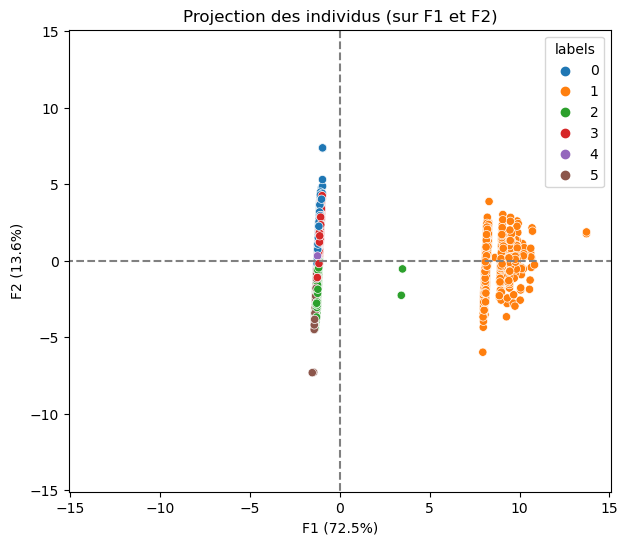

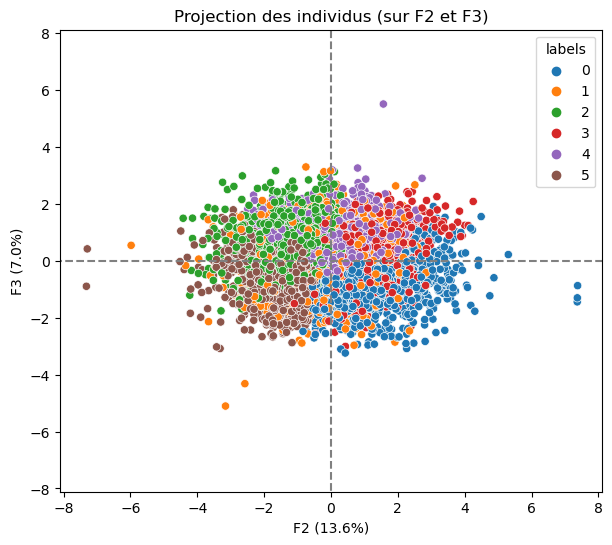

In [56]:
# Projection des individus
features_projected = pca.transform(features_trans)
display_factorial_planes(features_projected, n_comp, pca,
                         [(0, 1), (1, 2)], hue_serie=data_ag_model['labels'])
plt.show()

In [57]:
# 3D visualisation des projections sur les plans factoriels
from mpl_toolkits import mplot3d
%matplotlib qt
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection="3d")
colors = {0: 'blue',
          1: 'orange',
          2: 'green',
          3: 'red',
          4: 'purple',
          5: 'brown'}
ax.scatter3D(features_projected[:, 0],
             features_projected[:, 1],
             features_projected[:, 2],
             alpha=1,
             c=data_ag_model['labels'].map(colors),
             cmap='tab10')
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")
plt.show()

In [58]:
%matplotlib inline

In [59]:
# Visualisation des clusters par t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(features_trans)
tsne_plot = data_ag_model.copy()
tsne_plot['tsne_2d_1'] = tsne_results[:, 0]
tsne_plot['tsne_2d_2'] = tsne_results[:, 1]

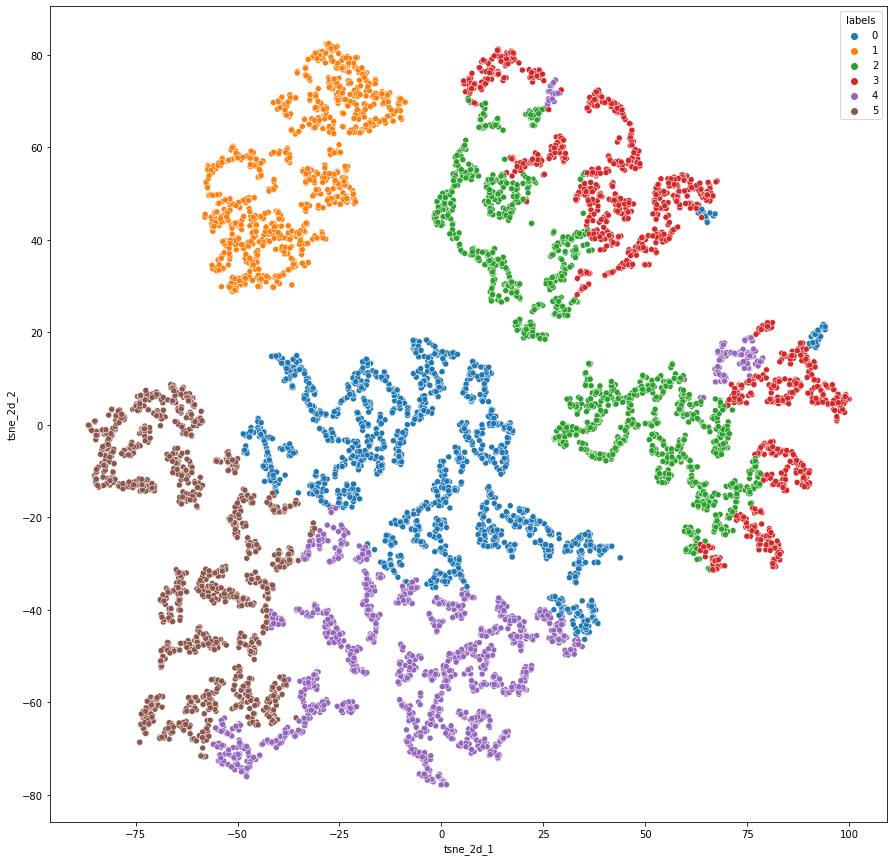

In [60]:
# Plot des samples dans t-SNE plot
plt.figure(figsize=(15, 15))
sns.scatterplot(x="tsne_2d_1", y="tsne_2d_2", hue="labels",
                palette='tab10',
                data=tsne_plot,
                legend="full")
plt.show()

## Estimation du contrat de maintenance

In [61]:
# Redéfinition des features (dataset complet)
list_features = categorical_features + numerical_features + discret_features
features = data_agg_4[list_features]
features_trans = preprocessor.fit_transform(features)

In [62]:
# Division du dataset en trimestres cumulés
data_cut_1 = agg_cut(data=data_to_agg,
                     first_date='2017-07-01 00:00:01',
                     last_date='2017-09-30 23:59:59')
data_cut_2 = agg_cut(data=data_to_agg,
                     first_date='2017-07-01 00:00:01',
                     last_date='2017-12-31 23:59:59')
data_cut_3 = agg_cut(data=data_to_agg,
                     first_date='2017-07-01 00:00:01',
                     last_date='2018-03-31 23:59:59')
data_cut_4 = agg_cut(data=data_to_agg,
                     first_date='2017-07-01 00:00:01',
                     last_date='2018-06-30 23:59:59')

In [63]:
# Préprocessing sur les différentes segmentations temporelles
list_features = categorical_features + numerical_features + discret_features
data_cut_1_trans = preprocessor.fit_transform(data_cut_1[list_features])
data_cut_2_trans = preprocessor.fit_transform(data_cut_2[list_features])
data_cut_3_trans = preprocessor.fit_transform(data_cut_3[list_features])
data_cut_4_trans = preprocessor.fit_transform(data_cut_4[list_features])

In [64]:
# Fit avec le modèle choisi
data_cut_1['labels'] = km_model.fit(data_cut_1_trans).labels_
data_cut_2['labels'] = km_model.fit(data_cut_2_trans).labels_
data_cut_3['labels'] = km_model.fit(data_cut_3_trans).labels_
data_cut_4['labels'] = km_model.fit(data_cut_4_trans).labels_

In [65]:
# Score des différents fit
dbscore_1 = db_score(data_cut_1_trans, data_cut_1['labels'])
sil_score_1 = silhouette_score(data_cut_1_trans, data_cut_1['labels'])

dbscore_2 = db_score(data_cut_2_trans, data_cut_2['labels'])
sil_score_2 = silhouette_score(data_cut_2_trans, data_cut_2['labels'])

dbscore_3 = db_score(data_cut_3_trans, data_cut_3['labels'])
sil_score_3 = silhouette_score(data_cut_3_trans, data_cut_3['labels'])

dbscore_4 = db_score(data_cut_4_trans, data_cut_4['labels'])
sil_score_4 = silhouette_score(data_cut_4_trans, data_cut_4['labels'])

display(f"Trimestre 1 : DB score = {dbscore_1},"
        f" silhouette = {sil_score_1}",
        f"Trimestres 1 et 2 : DB score = {dbscore_2},"
        f" silhouette = {sil_score_2}",
        f"Trimestres 1, 2 et 3 : DB score = {dbscore_3},"
        f" silhouette = {sil_score_3}",
        f"Trimestres 1, 2, 3 et 4 : DB score = {dbscore_4},"
        f" silhouette = {sil_score_4}")

'Trimestre 1 : DB score = 0.8977882755896535, silhouette = 0.3201058204338339'

'Trimestres 1 et 2 : DB score = 0.9167579523602707, silhouette = 0.31621165053772926'

'Trimestres 1, 2 et 3 : DB score = 0.9442773253729854, silhouette = 0.31930158374944145'

'Trimestres 1, 2, 3 et 4 : DB score = 0.9206890584576097, silhouette = 0.32382613452832265'

In [66]:
# Calcul des valeurs statistiques pour chaque cluster
stat_1 = pd.pivot_table(data_cut_1,
                        values=features.columns,
                        index=['labels', 'customer_unique_id'])
stat_2 = pd.pivot_table(data_cut_2,
                        values=features.columns,
                        index=['labels', 'customer_unique_id'])
stat_3 = pd.pivot_table(data_cut_3,
                        values=features.columns,
                        index=['labels', 'customer_unique_id'])
stat_4 = pd.pivot_table(data_cut_4,
                        values=features.columns,
                        index=['labels', 'customer_unique_id'])

In [67]:
# Uniformisation des labels
data_cut_1 = uniform_label(data_cut_1)
data_cut_2 = uniform_label(data_cut_2)
data_cut_3 = uniform_label(data_cut_3)
data_cut_4 = uniform_label(data_cut_4)

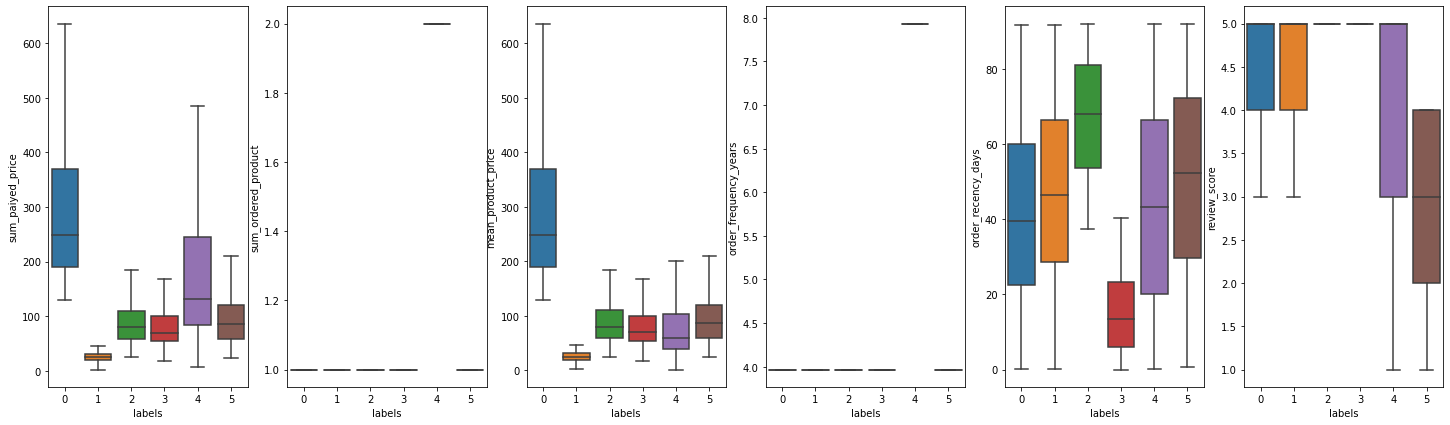

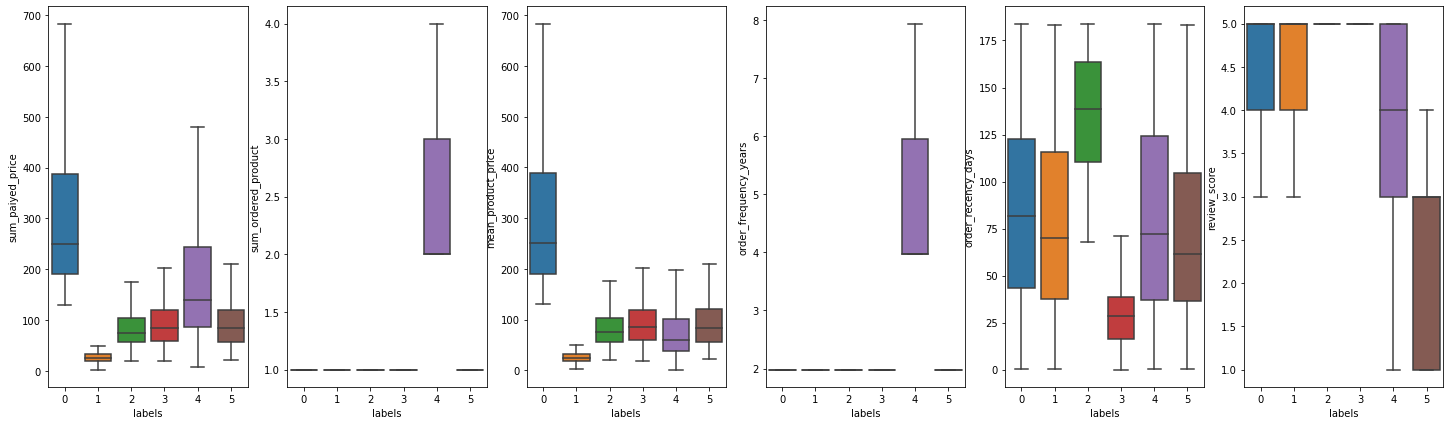

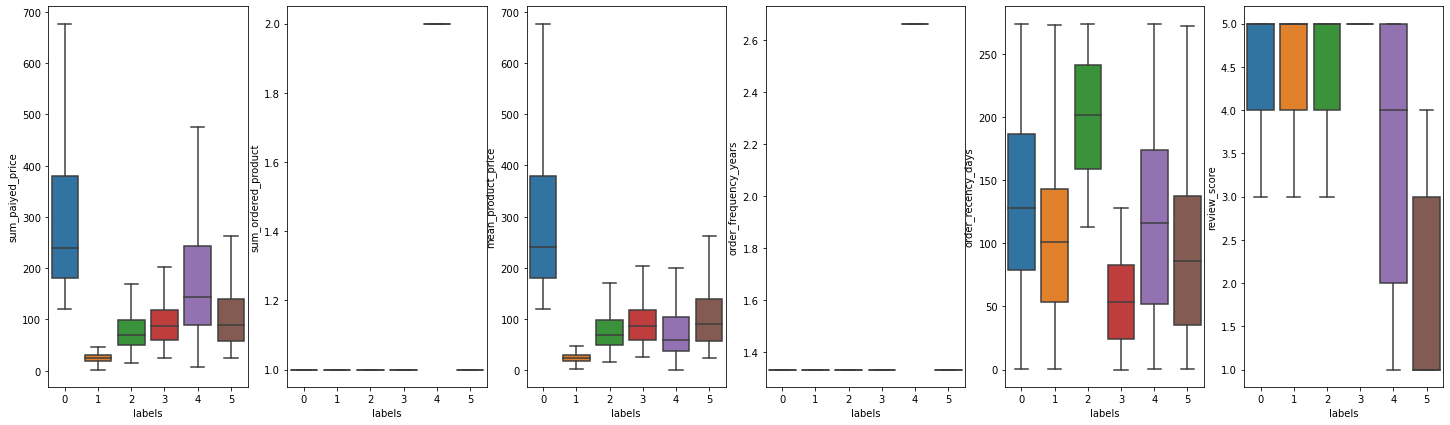

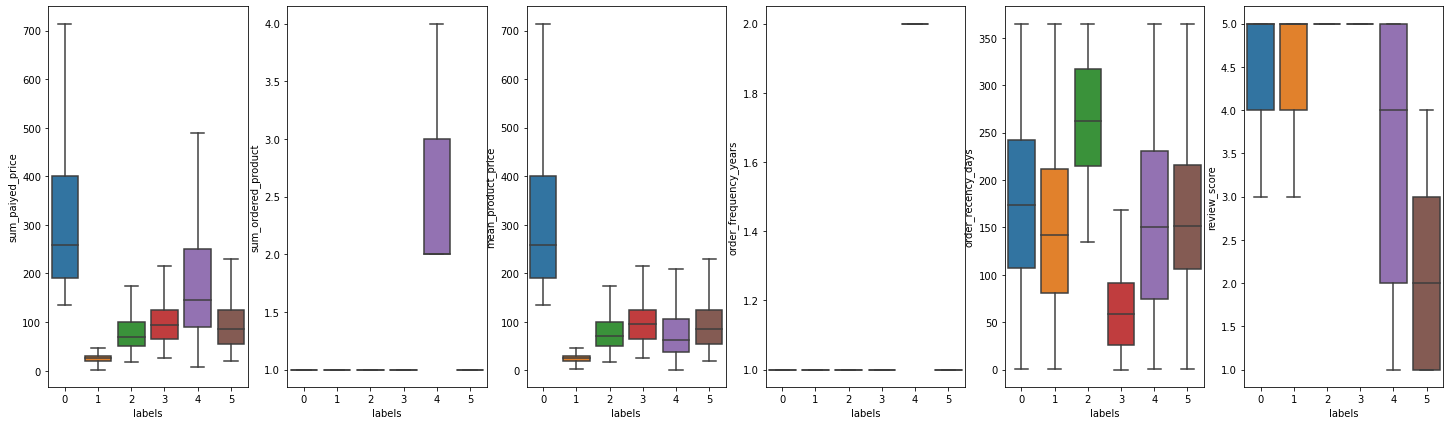

In [68]:
# Représentation graphique des features des clusters
plt.figure(figsize=(25, 7))
for col, x in zip(features.columns, range(1, len(features.columns)+1)):
    plt.subplot(1, len(features.columns), x)
    sns.boxplot(y=col, x='labels', data=data_cut_1, showfliers=False)
plt.savefig('t1_bbox.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(25, 7))
for col, x in zip(features.columns, range(1, len(features.columns)+1)):
    plt.subplot(1, len(features.columns), x)
    sns.boxplot(y=col, x='labels', data=data_cut_2, showfliers=False)
plt.savefig('t12_bbox.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(25, 7))
for col, x in zip(features.columns, range(1, len(features.columns)+1)):
    plt.subplot(1, len(features.columns), x)
    sns.boxplot(y=col, x='labels', data=data_cut_3, showfliers=False)
plt.savefig('t123_bbox.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(25, 7))
for col, x in zip(features.columns, range(1, len(features.columns)+1)):
    plt.subplot(1, len(features.columns), x)
    sns.boxplot(y=col, x='labels', data=data_cut_4, showfliers=False)
plt.savefig('t1234_bbox.png', bbox_inches='tight')
plt.show()

### Diagramme de Sankey

In [69]:
# Définition des paramètres label, source et target pour le diagramme de Sankey
labels = ["Clients gros achats", "Clients petit achat", "Clients achat ancien",
          "Clients nouveaux", "Clients réguliers",
          "Clients moyens peu satisfaits",
          "Clients gros achats", "Clients petit achat", "Clients achat ancien",
          "Clients nouveaux", "Clients réguliers",
          "Clients moyens peu satisfaits",
          "Clients gros achats", "Clients petit achat", "Clients achat ancien",
          "Clients nouveaux", "Clients réguliers",
          "Clients moyens peu satisfaits",
          "Clients gros achats", "Clients petit achat", "Clients achat ancien",
          "Clients nouveaux", "Clients réguliers",
          "Clients moyens peu satisfaits"]
labels_x = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
            0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
            0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
            1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
labels_y = [1.0, 0.8, 0.6, 0.4, 0.2, 0.01,
            1.0, 0.8, 0.6, 0.4, 0.2, 0.01,
            1.0, 0.8, 0.6, 0.4, 0.2, 0.01,
            1.0, 0.8, 0.6, 0.4, 0.2, 0.01]
color_dic = ["#FEF3C7", "#FEF3C7", "#FEF3C7", "#FEF3C7", "#FEF3C7", "#FEF3C7",
             "#EBBAB5", "#EBBAB5", "#EBBAB5", "#EBBAB5", "#EBBAB5", "#EBBAB5",
             "orange", "orange", "orange", "orange", "orange", "orange",
             "red", "red", "red", "red", "red", "red"]
source = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
          3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
          6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
          9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
          12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
          14, 14, 14, 14, 14, 14,
          15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
          17, 17, 17, 17, 17, 17]

target = [6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11,
          6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11,
          12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17, 12,
          13, 14, 15, 16, 17,
          12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17, 12,
          13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23, 18,
          19, 20, 21, 22, 23,
          18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23, 18,
          19, 20, 21, 22, 23]

In [70]:
# Calcul des paramètres values du diagramme de Sankey
label_list = data_cut_1['labels'].value_counts().sort_index().index
index_cut_1 = []
index_cut_2 = []
index_cut_3 = []
index_cut_4 = []

for label in label_list:
    index_1 = data_cut_1[data_cut_1['labels'] == label].index
    index_2 = data_cut_2[data_cut_2['labels'] == label].index
    index_3 = data_cut_3[data_cut_3['labels'] == label].index
    index_4 = data_cut_4[data_cut_4['labels'] == label].index

    index_cut_1.append(index_1)
    index_cut_2.append(index_2)
    index_cut_3.append(index_3)
    index_cut_4.append(index_4)


value = []

for index_1 in index_cut_1:
    for index_2 in index_cut_2:
        value_1 = sum(index_2.isin(index_1))
        value.append(value_1)
for index_2 in index_cut_2:
    for index_3 in index_cut_3:
        value_2 = sum(index_3.isin(index_2))
        value.append(value_2)
for index_3 in index_cut_3:
    for index_4 in index_cut_4:
        value_3 = sum(index_4.isin(index_3))
        value.append(value_3)

In [71]:
# Visualisation graphique du diagramme de Sankey
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(node=dict(pad=15,
                                          thickness=20,
                                          line=dict(color="black", width=0.5),
                                          label=labels,
                                          x=labels_x,
                                          y=labels_y,
                                          color=color_dic),
                                link=dict(source=source,
                                          target=target,
                                          value=value))])

fig.update_layout(title_text="Diagramme de Sankey"
                  "de la segmentation clients", font_size=10)
fig.show()

### ARI

In [72]:
# Calcul des ARI pour chaque découpage temporelle
from sklearn.metrics import adjusted_rand_score as ari

trimestres = [1, 2, 3, 4]
labels_true = data_cut_1['labels']
labels_index = data_cut_1['labels'].index
ari_1 = ari(labels_true,
            data_cut_1.loc[labels_index, 'labels'])
ari_2 = ari(labels_true,
            data_cut_2.loc[labels_index, 'labels'])
ari_3 = ari(labels_true,
            data_cut_3.loc[labels_index, 'labels'])
ari_4 = ari(labels_true,
            data_cut_4.loc[labels_index, 'labels'])

ari_list = [ari_1, ari_2, ari_3, ari_4]

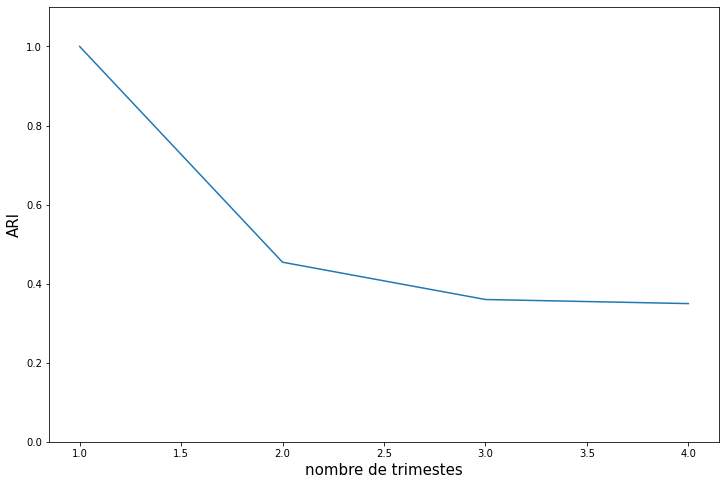

In [73]:
# Visualisation des ARI
plt.figure(figsize=(12, 8))
plt.plot(trimestres, ari_list)
plt.xlabel("nombre de trimestes", fontsize=15)
plt.ylabel("ARI", fontsize=15)
plt.ylim([0, 1.1])
plt.savefig("ARI.png", bbox_inches='tight')
plt.show()